# Import the Datasets A + B

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#https://www.kaggle.com/datasets/elvinagammed/covid19-fake-news-dataset-nlp?select=english_test_with_labels.csv
data1 = pd.read_csv('Constraint_Train.csv')
data1['title']=data1.tweet
data1 = data1.drop(['tweet'],axis=1)
data1['Label']=data1.label
data1 = data1.drop(['label'],axis=1)
data1 = data1.drop(['id'],axis=1)

data2 = pd.read_csv('Constraint_Val.csv')
data2['title']=data2.tweet
data2 = data2.drop(['tweet'],axis=1)
data2['Label']=data2.label
data2 = data2.drop(['label'],axis=1)
data2 = data2.drop(['id'],axis=1)

data3 = pd.read_csv('english_test_with_labels.csv')
data3['title']=data3.tweet
data3 = data3.drop(['tweet'],axis=1)
data3['Label']=data3.label
data3 = data3.drop(['label'],axis=1)
data3 = data3.drop(['id'],axis=1)

dataA = pd.concat([data1,data2, data3],ignore_index=True)
dataA.replace({'fake': 0, 'real': 1}, inplace=True)
dataA.head()

title  Label
0  The CDC currently reports 99031 deaths. In gen...      1
1  States reported 1121 deaths a small rise from ...      1
2  Politically Correct Woman (Almost) Uses Pandem...      0
3  #IndiaFightsCorona: We have 1524 #COVID testin...      1
4  Populous states can generate large case counts...      1

In [3]:
#https://www.kaggle.com/datasets/arashnic/covid19-fake-news
data_real_1 = pd.read_csv('NewsRealCOVID-19.csv')
data_real_2 = pd.read_csv('NewsRealCOVID-19_5.csv')
data_real = pd.concat([data_real_1, data_real_2], ignore_index=True)
data_real = data_real.drop(['Unnamed: 0', 'content', 'type','news_url','newstitle','abstract','publish_date','meta_keywords','fact_check_url'], axis=1)
data_real['Label']=1

data_fake_1 = pd.read_csv('NewsFakeCOVID-19.csv')
data_fake_2 = pd.read_csv('NewsFakeCOVID-19_5.csv')
data_fake_3 = pd.read_csv('NewsFakeCOVID-19_7.csv')
data_fake = pd.concat([data_fake_1, data_fake_2,data_fake_3], ignore_index=True)
data_fake = data_fake.drop(['Unnamed: 0','content', 'type', 'fact_check_url', 'archieve', 'news_url','news_url2', 'news_url3', 'news_url4', 'news_url5','newstitle', 'abstract', 'publish_date', 'meta_keywords'], axis=1)
data_fake['Label'] = 0

dataB = pd.concat([data_real,data_fake],ignore_index=True)
dataB = dataB.sample(frac=1).reset_index(drop=True)
dataB.head()

title  Label
0  “We’re down near the low end of per capita dea...      0
1  Many Daycare Centers Don’t Require Kids or Adu...      1
2  WHO launch trial testing 4 potential treatment...      1
3  Whether coronavirus began with man having sex ...      0
4        Can you get coronavirus twice? What to know      1

In [4]:
data = pd.concat([dataA,dataB],ignore_index=True)
data = data.sample(frac=1).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14077 entries, 0 to 14076
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   14077 non-null  object
 1   Label   14077 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 220.1+ KB


#  Descriptive statistics

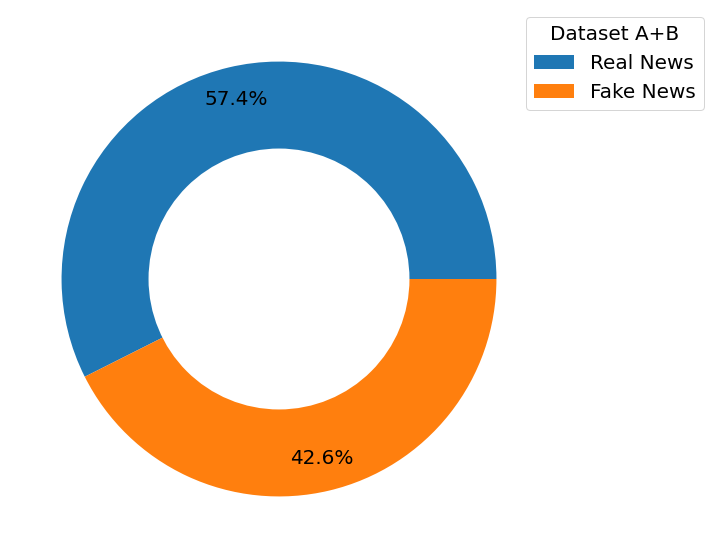

In [5]:
plt.rcParams['font.size'] = 20
labels  = ['Real News', 'Fake News']  
plt.figure(figsize=(10, 10))
sizes  = [data['Label'].value_counts()[1], data['Label'].value_counts()[0]]
plt.pie(sizes, autopct='%1.1f%%',pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(labels, loc=1,bbox_to_anchor=(1.3, 1), title='Dataset A+B')
plt.show()

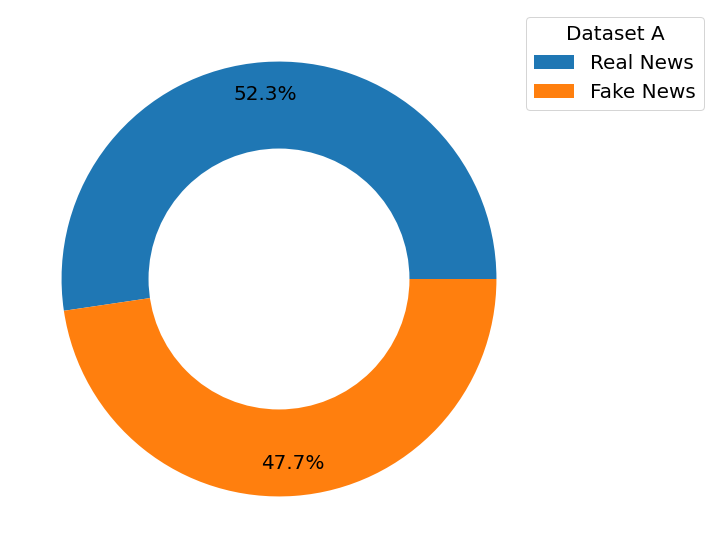

In [6]:
plt.rcParams['font.size'] = 20
labels  = ['Real News', 'Fake News']  
plt.figure(figsize=(10, 10))
sizes  = [dataA['Label'].value_counts()[1], dataA['Label'].value_counts()[0]]
plt.pie(sizes, autopct='%1.1f%%',pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(labels, loc=1,bbox_to_anchor=(1.3, 1), title='Dataset A')
plt.show()

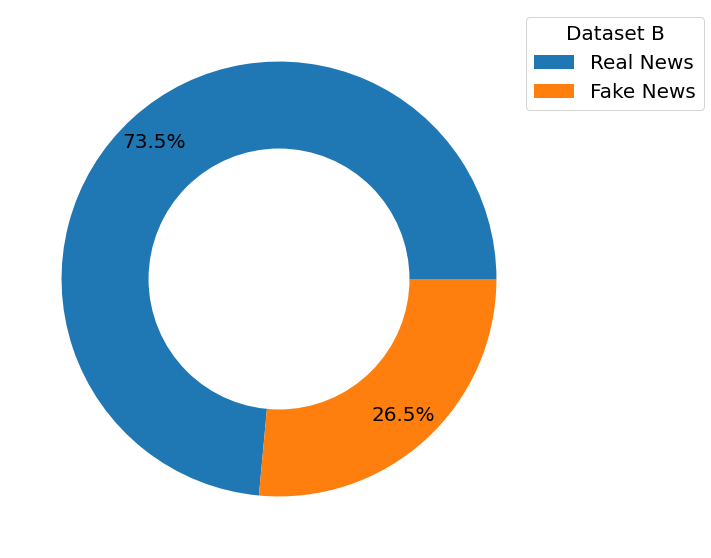

In [7]:
plt.rcParams['font.size'] = 20
labels  = ['Real News', 'Fake News']  
plt.figure(figsize=(10, 10))
sizes  = [dataB['Label'].value_counts()[1], dataB['Label'].value_counts()[0]]
plt.pie(sizes, autopct='%1.1f%%',pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(labels, loc=1,bbox_to_anchor=(1.3, 1), title='Dataset B')
plt.show()

# Stopwords and ngrams

In [8]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','https', 'http','#', 'ー']) 
import gensim

def preprocess(text):
    text = ' '.join(word for word in text.split(' ') if not word.startswith('https://'))
    text = ' '.join(word for word in text.split(' ') if not word.startswith('http://'))
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
            
    return result


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Αλέξανδρος\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [9]:
from nltk import ngrams

def n_grams(text,n=1):
    xgrams = ngrams(text.split(), n)
    result = []
    for token in xgrams:
        result.append(list(token))
            
    return result

In [10]:
dataA['clean'] = dataA['title'].apply(preprocess)
dataB['clean'] = dataB['title'].apply(preprocess)
data['clean'] = data['title'].apply(preprocess)

dataA['clean_joined'] = dataA['clean'].apply(lambda x: " ".join(x))
dataB['clean_joined'] = dataB['clean'].apply(lambda x: " ".join(x))
data['clean_joined'] = data['clean'].apply(lambda x: " ".join(x))

# 1-Grams Dataset B

In [11]:
dataB['clean_joined_ngram'] = dataB['clean_joined'].apply(n_grams,n=1)

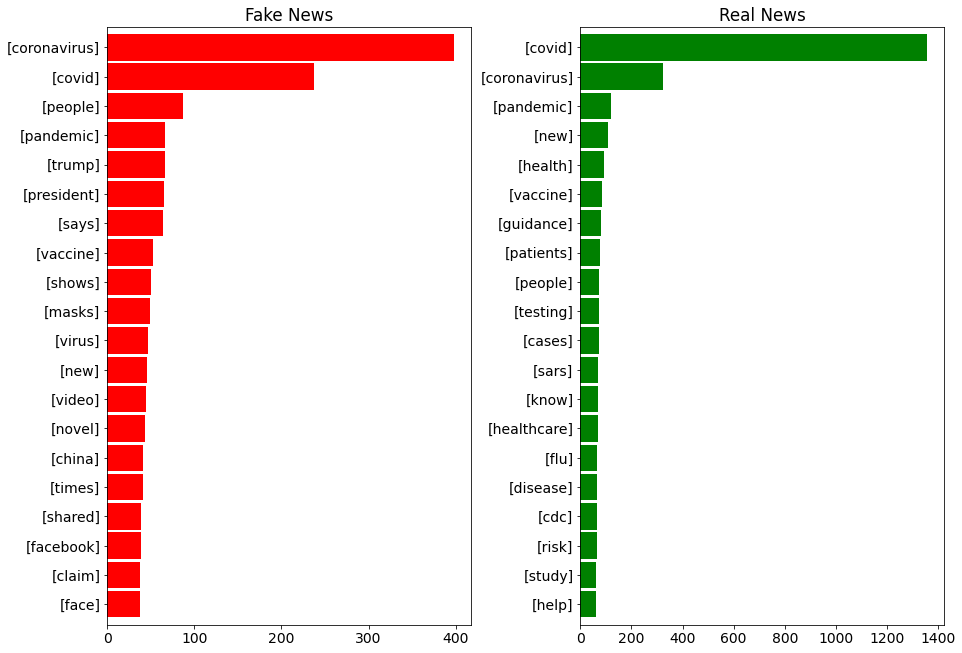

In [12]:
list_of_words_real_dataB = []
for i in range(0,3377):
    if dataB['Label'][i]==1:
        for j in dataB['clean_joined_ngram'][i]:
            list_of_words_real_dataB.append(j)
            
            
list_of_words_fake_dataB = []
for i in range(0,3377):
    if dataB['Label'][i]==0:
        for j in dataB['clean_joined_ngram'][i]:
            list_of_words_fake_dataB.append(j) 

plt.rcParams['font.size'] = 14          
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(15,11))
plt.gca().set_title('title')
            
series_fakeB = (pd.Series(list_of_words_fake_dataB).value_counts())[:20]
series_realB = (pd.Series(list_of_words_real_dataB).value_counts())[:20]

series_fakeB.sort_values().plot.barh(color='red', width=.9, ax=ax, title='Fake News')
series_realB.sort_values().plot.barh(color='green', width=.9, ax=ax2, title='Real News')
fig.subplots_adjust(wspace=0.3)

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from PIL import Image

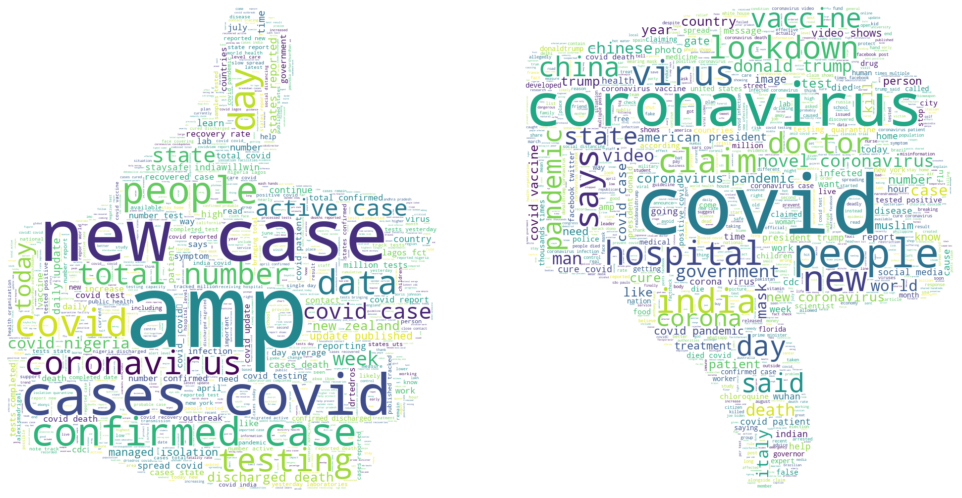

In [14]:
fig, (ax, ax2) = plt.subplots(1, 2,figsize=(17,15))
custom_mask1 = np.array(Image.open("like.png"))
custom_mask2 = np.array(Image.open("unlike.png"))
wc1 = WordCloud(max_words = 1000 , width = 1600 , height = 800, stopwords = stop_words, background_color="white", mask = custom_mask1).generate(" ".join(dataA[dataA['Label'] == 1].clean_joined))
ax.imshow(wc1, interpolation = 'bilinear')
ax.axis("off")
wc2 = WordCloud(max_words = 1000 , width = 1600 , height = 800 , stopwords = stop_words, background_color="white", mask = custom_mask2).generate(" ".join(dataA[dataA['Label'] == 0].clean_joined))
ax2.imshow(wc2, interpolation = 'bilinear')
ax2.axis("off")
fig.subplots_adjust(wspace=0.2)
plt.show()

# 1-Grams Dataset A

In [15]:
dataA['clean_joined_ngram'] = dataA['clean_joined'].apply(n_grams,n=1)

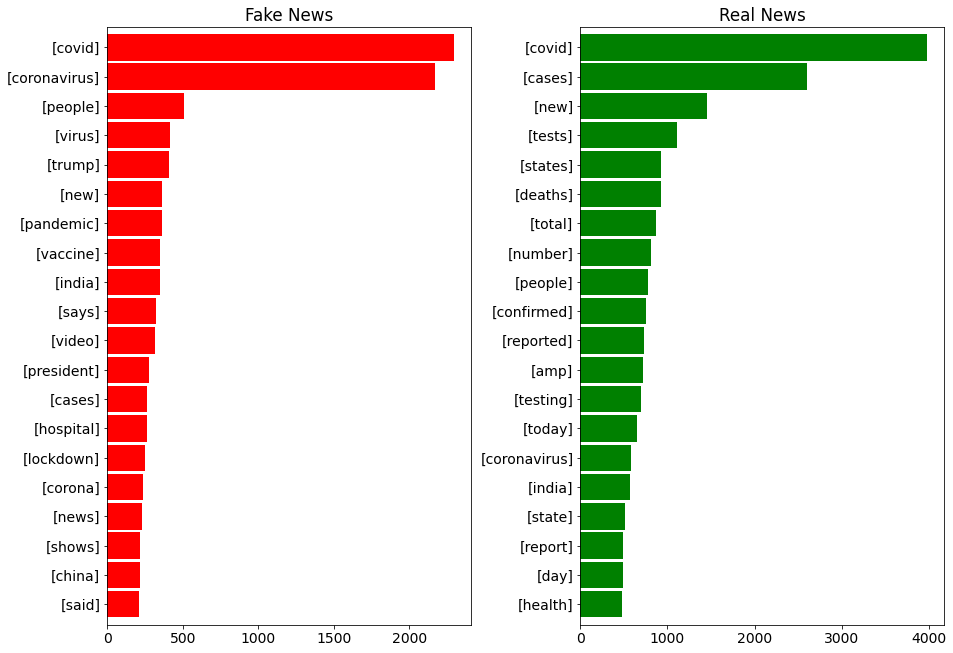

In [16]:
list_of_words_real_dataA = []
for i in range(0,10700):
    if dataA['Label'][i]==1:
        for j in dataA['clean_joined_ngram'][i]:
            list_of_words_real_dataA.append(j)
            
            
list_of_words_fake_dataA = []
for i in range(0,10700):
    if dataA['Label'][i]==0:
        for j in dataA['clean_joined_ngram'][i]:
            list_of_words_fake_dataA.append(j) 

plt.rcParams['font.size'] = 14          
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(15,11))
            
series_fakeΑ = (pd.Series(list_of_words_fake_dataA).value_counts())[:20]
series_realΑ = (pd.Series(list_of_words_real_dataA).value_counts())[:20]

series_fakeΑ.sort_values().plot.barh(color='red', width=.9, ax=ax, title='Fake News')
series_realΑ.sort_values().plot.barh(color='green', width=.9, ax=ax2, title='Real News')
fig.subplots_adjust(wspace=0.3)

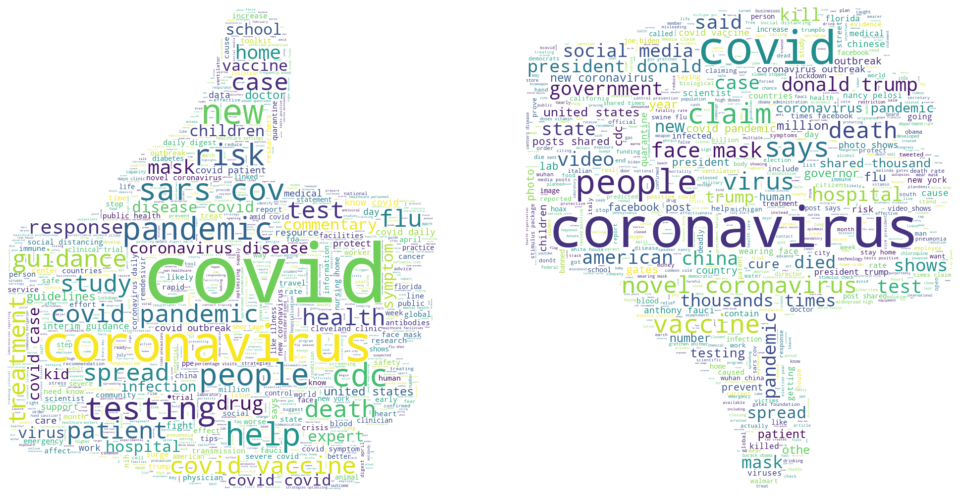

In [17]:
fig, (ax, ax2) = plt.subplots(1, 2,figsize=(17,15))
custom_mask1 = np.array(Image.open("like.png"))
custom_mask2 = np.array(Image.open("unlike.png"))
wc1 = WordCloud(max_words = 1000 , width = 1600 , height = 800, stopwords = stop_words, background_color="white", mask = custom_mask1).generate(" ".join(dataB[dataB['Label'] == 1].clean_joined))
ax.imshow(wc1, interpolation = 'bilinear')
ax.axis("off")
wc2 = WordCloud(max_words = 1000 , width = 1600 , height = 800 , stopwords = stop_words, background_color="white", mask = custom_mask2).generate(" ".join(dataB[dataB['Label'] == 0].clean_joined))
ax2.imshow(wc2, interpolation = 'bilinear')
ax2.axis("off")
plt.show()

# 2-Grams Dataset A

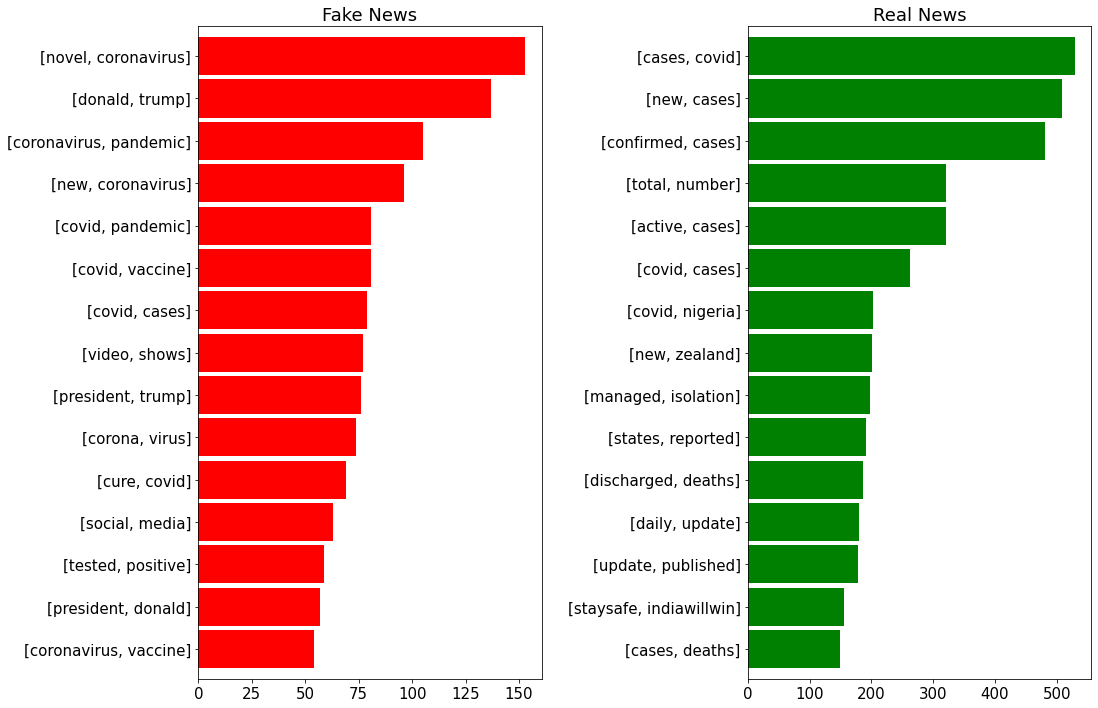

In [18]:
dataA['clean_joined_ngram'] = dataA['clean_joined'].apply(n_grams,n=2)

list_of_words_real_dataA = []
for i in range(0,10700):
    if dataA['Label'][i]==1:
        for j in dataA['clean_joined_ngram'][i]:
            list_of_words_real_dataA.append(j)
            
            
list_of_words_fake_dataA = []
for i in range(0,10700):
    if dataA['Label'][i]==0:
        for j in dataA['clean_joined_ngram'][i]:
            list_of_words_fake_dataA.append(j) 

plt.rcParams['font.size'] = 15          
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(16,12))
            
series_fakeΑ = (pd.Series(list_of_words_fake_dataA).value_counts())[:15]
series_realΑ = (pd.Series(list_of_words_real_dataA).value_counts())[:15]

series_fakeΑ.sort_values().plot.barh(color='red', width=.9, ax=ax, title='Fake News')
series_realΑ.sort_values().plot.barh(color='green', width=.9, ax=ax2, title='Real News')
fig.subplots_adjust(wspace=0.6)

# 2-Grams Dataset B

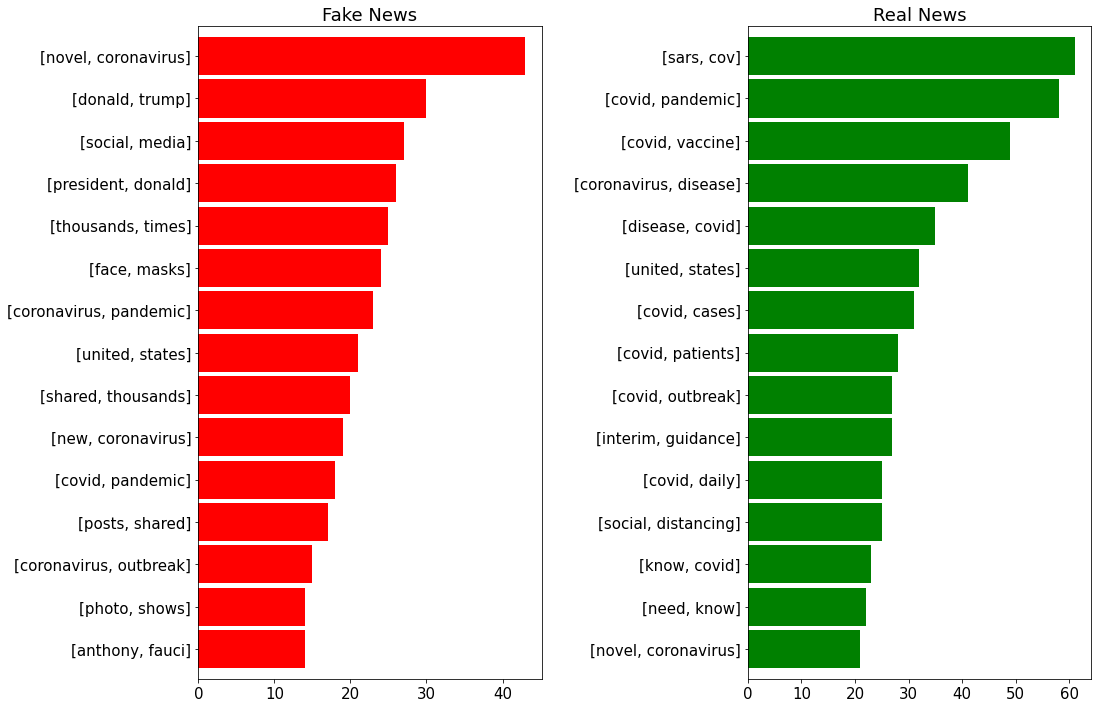

In [19]:
dataB['clean_joined_ngram'] = dataB['clean_joined'].apply(n_grams,n=2)

list_of_words_real_dataB = []
for i in range(0,3377):
    if dataB['Label'][i]==1:
        for j in dataB['clean_joined_ngram'][i]:
            list_of_words_real_dataB.append(j)
            
            
list_of_words_fake_dataB = []
for i in range(0,3377):
    if dataB['Label'][i]==0:
        for j in dataB['clean_joined_ngram'][i]:
            list_of_words_fake_dataB.append(j) 

            
plt.rcParams['font.size'] = 15          
fig, (ax, ax2) = plt.subplots(1, 2,figsize=(16,12))

series_fakeB = (pd.Series(list_of_words_fake_dataB).value_counts())[:15]
series_realB = (pd.Series(list_of_words_real_dataB).value_counts())[:15]

series_fakeB.sort_values().plot.barh(color='red', width=.9, ax=ax, title='Fake News')
series_realB.sort_values().plot.barh(color='green', width=.9, ax=ax2, title='Real News')
fig.subplots_adjust(wspace=0.6)

# 3-Grams Dataset A

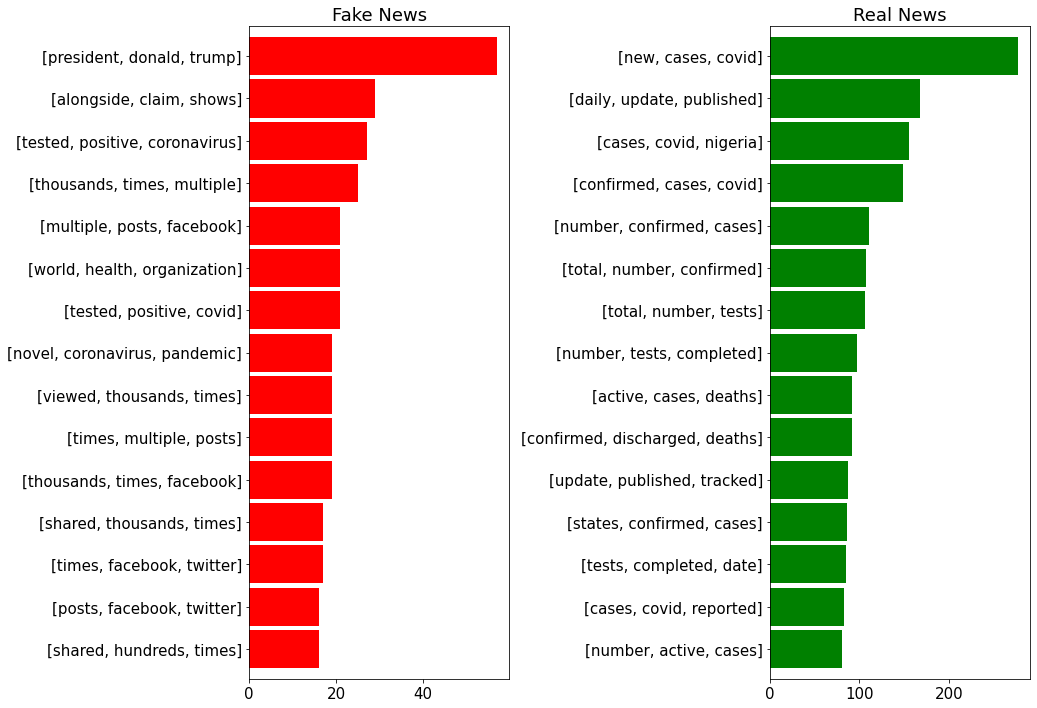

In [20]:
dataA['clean_joined_ngram'] = dataA['clean_joined'].apply(n_grams,n=3)

list_of_words_real_dataA = []
for i in range(0,10700):
    if dataA['Label'][i]==1:
        for j in dataA['clean_joined_ngram'][i]:
            list_of_words_real_dataA.append(j)
            
            
list_of_words_fake_dataA = []
for i in range(0,10700):
    if dataA['Label'][i]==0:
        for j in dataA['clean_joined_ngram'][i]:
            list_of_words_fake_dataA.append(j) 

plt.rcParams['font.size'] = 15          
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(14,12))
            
series_fakeΑ = (pd.Series(list_of_words_fake_dataA).value_counts())[:15]
series_realΑ = (pd.Series(list_of_words_real_dataA).value_counts())[:15]

series_fakeΑ.sort_values().plot.barh(color='red', width=.9, ax=ax, title='Fake News')
series_realΑ.sort_values().plot.barh(color='green', width=.9, ax=ax2, title='Real News')
fig.subplots_adjust(wspace=1.0)

# 3-Grams Dataset B

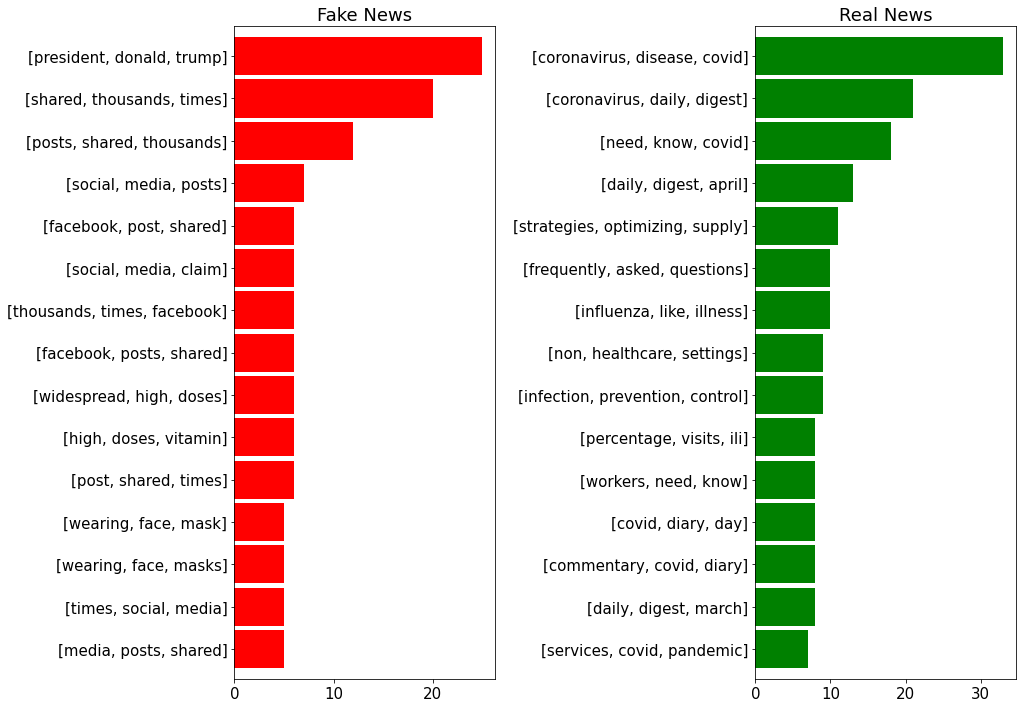

In [21]:
dataB['clean_joined_ngram'] = dataB['clean_joined'].apply(n_grams,n=3)

list_of_words_real_dataB = []
for i in range(0,3377):
    if dataB['Label'][i]==1:
        for j in dataB['clean_joined_ngram'][i]:
            list_of_words_real_dataB.append(j)
            
            
list_of_words_fake_dataB = []
for i in range(0,3377):
    if dataB['Label'][i]==0:
        for j in dataB['clean_joined_ngram'][i]:
            list_of_words_fake_dataB.append(j) 

            
plt.rcParams['font.size'] = 15          
fig, (ax, ax2) = plt.subplots(1, 2,figsize=(14,12))

series_fakeB = (pd.Series(list_of_words_fake_dataB).value_counts())[:15]
series_realB = (pd.Series(list_of_words_real_dataB).value_counts())[:15]

series_fakeB.sort_values().plot.barh(color='red', width=.9, ax=ax, title='Fake News')
series_realB.sort_values().plot.barh(color='green', width=.9, ax=ax2, title='Real News')
fig.subplots_adjust(wspace=1.0)

In [22]:
dataB = dataB.drop(['clean_joined_ngram'], axis=1)
dataA = dataA.drop(['clean_joined_ngram'], axis=1)

# Preprocessing

In [23]:
testA = dataA.tail(100)
testA = testA.reset_index(drop=True)
dataA.drop(dataA.tail(100).index, inplace = True)

testB = dataB.tail(100)
testB = testB.reset_index(drop=True)
dataB.drop(dataB.tail(100).index, inplace = True)

test = data.tail(100)
test = test.reset_index(drop=True)
data.drop(data.tail(100).index, inplace = True)

In [24]:
from nltk.stem import PorterStemmer, LancasterStemmer   
ps =PorterStemmer()
ls =LancasterStemmer()

In [25]:
from nltk.stem import PorterStemmer, LancasterStemmer 
ps =PorterStemmer()
ls =LancasterStemmer()
dataA['clean_ps'] = dataA['clean'].apply(lambda x: [ps.stem(y) for y in x])
testA['clean_ps'] = testA['clean'].apply(lambda x: [ps.stem(y) for y in x])

dataB['clean_ps'] = dataB['clean'].apply(lambda x: [ps.stem(y) for y in x])
testB['clean_ps'] = testB['clean'].apply(lambda x: [ps.stem(y) for y in x])

data['clean_ps'] = data['clean'].apply(lambda x: [ps.stem(y) for y in x])
test['clean_ps'] = test['clean'].apply(lambda x: [ps.stem(y) for y in x])

dataA['clean_ls'] = dataA['clean'].apply(lambda x: [ls.stem(y) for y in x])
testA['clean_ls'] = testA['clean'].apply(lambda x: [ls.stem(y) for y in x])

dataB['clean_ls'] = dataB['clean'].apply(lambda x: [ls.stem(y) for y in x])
testB['clean_ls'] = testB['clean'].apply(lambda x: [ls.stem(y) for y in x])

data['clean_ls'] = data['clean'].apply(lambda x: [ls.stem(y) for y in x])
test['clean_ls'] = test['clean'].apply(lambda x: [ls.stem(y) for y in x])

In [26]:
print(f"{dataA['title'][0]}\n\n Remove Stopwords PorterStemmer \n{dataA['clean'][0]}\n\n With PorterStemmer \n{dataA['clean_ps'][0]}\n\n With LancasterStemmer \n{dataA['clean_ls'][0]}")

The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.

 Remove Stopwords PorterStemmer 
['cdc', 'currently', 'reports', 'deaths', 'general', 'discrepancies', 'death', 'counts', 'different', 'sources', 'small', 'explicable', 'death', 'toll', 'stands', 'roughly', 'people', 'today']

 With PorterStemmer 
['cdc', 'current', 'report', 'death', 'gener', 'discrep', 'death', 'count', 'differ', 'sourc', 'small', 'explic', 'death', 'toll', 'stand', 'roughli', 'peopl', 'today']

 With LancasterStemmer 
['cdc', 'cur', 'report', 'death', 'gen', 'discrep', 'dea', 'count', 'diff', 'sourc', 'smal', 'expl', 'dea', 'tol', 'stand', 'rough', 'peopl', 'today']


In [27]:
print(f"{dataB['title'][0]}\n\n Remove Stopwords PorterStemmer \n{dataB['clean'][0]}\n\n With PorterStemmer \n{dataB['clean_ps'][0]}\n\n With LancasterStemmer \n{dataB['clean_ls'][0]}")

“We’re down near the low end of per capita deaths … Most places are at 60 deaths per 100000. We’re at 29.”

 Remove Stopwords PorterStemmer 
['near', 'low', 'end', 'capita', 'deaths', 'places', 'deaths']

 With PorterStemmer 
['near', 'low', 'end', 'capita', 'death', 'place', 'death']

 With LancasterStemmer 
['near', 'low', 'end', 'capit', 'death', 'plac', 'death']


In [28]:
from sklearn.model_selection import train_test_split
x_train_A_ps, x_test_A_ps, y_train_A_ps, y_test_A_ps = train_test_split(dataA.clean_ps, dataA.Label, test_size = 0.1, random_state=42)
x_train_A_ls, x_test_A_ls, y_train_A_ls, y_test_A_ls = train_test_split(dataA.clean_ls, dataA.Label, test_size = 0.1, random_state=42)

x_train_B_ps, x_test_B_ps, y_train_B_ps, y_test_B_ps = train_test_split(dataB.clean_ps, dataB.Label, test_size = 0.1, random_state=42)
x_train_B_ls, x_test_B_ls, y_train_B_ls, y_test_B_ls = train_test_split(dataB.clean_ls, dataB.Label, test_size = 0.1, random_state=42)


x_train_ps, x_test_ps, y_train_ps, y_test_ps = train_test_split(data.clean_ps, data.Label, test_size = 0.1, random_state=42)
x_train_ls, x_test_ls, y_train_ls, y_test_ls = train_test_split(data.clean_ls, data.Label, test_size = 0.1, random_state=42)


In [29]:
#ps
x_train_A_ps = pd.DataFrame(x_train_A_ps)
y_train_A_ps = pd.DataFrame(y_train_A_ps)

x_test_A_ps = pd.DataFrame(x_test_A_ps)
y_test_A_ps = pd.DataFrame(y_test_A_ps)

x_train_B_ps = pd.DataFrame(x_train_B_ps)
y_train_B_ps = pd.DataFrame(y_train_B_ps)

x_test_B_ps = pd.DataFrame(x_test_B_ps)
y_test_B_ps = pd.DataFrame(y_test_B_ps)

x_train_ps = pd.DataFrame(x_train_ps)
y_train_ps = pd.DataFrame(y_train_ps)

x_test_ps = pd.DataFrame(x_test_ps)
y_test_ps = pd.DataFrame(y_test_ps)

#ls
x_train_A_ls = pd.DataFrame(x_train_A_ls)
y_train_A_ls = pd.DataFrame(y_train_A_ls)

x_test_A_ls = pd.DataFrame(x_test_A_ls)
y_test_A_ls = pd.DataFrame(y_test_A_ls)

x_train_B_ls = pd.DataFrame(x_train_B_ls)
y_train_B_ls = pd.DataFrame(y_train_B_ls)

x_test_B_ls = pd.DataFrame(x_test_B_ls)
y_test_B_ls = pd.DataFrame(y_test_B_ls)

x_train_ls = pd.DataFrame(x_train_ls)
y_train_ls = pd.DataFrame(y_train_ls)

x_test_ls = pd.DataFrame(x_test_ls)
y_test_ls = pd.DataFrame(y_test_ls)

In [30]:
# Obtain the total words present in the x_train_A_ps
list_of_words_A_ps = []
for i in x_train_A_ps.clean_ps:
    for j in i:
        list_of_words_A_ps.append(j)
        
# Obtain the total words present in the x_train_B_ps
list_of_words_B_ps = []
for i in x_train_B_ps.clean_ps:
    for j in i:
        list_of_words_B_ps.append(j)
        
        
# Obtain the total words present in the x_train_A_ls
list_of_words_A_ls = []
for i in x_train_A_ls.clean_ls:
    for j in i:
        list_of_words_A_ls.append(j)
        
# Obtain the total words present in the x_train_B_ls
list_of_words_B_ls = []
for i in x_train_B_ls.clean_ls:
    for j in i:
        list_of_words_B_ls.append(j)
        
        
print(f'Count the total word:\n for train a with sp: {len(list_of_words_A_ps)}\n\nFor train b with sp: {len(list_of_words_B_ps)} \n\nFor train a with lp: {len(list_of_words_A_ls)}\n\nFor train b with lp: {len(list_of_words_B_ls)}')

print(f'Count the unique words:\n for train a with sp: {len(list(set(list_of_words_A_ps)))}\n\nFor train b with sp: {len(list(set(list_of_words_B_ps)))} \n\nFor train a with lp: {len(list(set(list_of_words_A_ls)))}\n\nFor train b with lp: {len(list(set(list_of_words_B_ls)))}')

Count the total word:
 for train a with sp: 135922

For train b with sp: 20257 

For train a with lp: 135922

For train b with lp: 20257
Count the unique words:
 for train a with sp: 10375

For train b with sp: 3592 

For train a with lp: 9097

For train b with lp: 3197


In [31]:
list(set(list_of_words_A_ps))

['dweller',
 'esccongress',
 'balasor',
 'qualiti',
 'afaik',
 'ramzan',
 'supervis',
 'hdrboq',
 'russel',
 'fueldog',
 'threat',
 'facebut',
 'venou',
 'toxin',
 'chimer',
 'nsitharaman',
 'keychain',
 'oxygentherapi',
 'thondaman',
 'oralhealth',
 'distanc',
 'amish',
 'diego',
 'climat',
 'ife',
 'creatiwit',
 'nowaday',
 'modiji',
 'punjab',
 'lighter',
 'florenc',
 'anttibiot',
 'text',
 'ye',
 'worker',
 'ramnavami',
 'swastika',
 'moham',
 'danielandrewsmp',
 'block',
 'camper',
 'vonderleyen',
 'prof',
 'ard',
 'coronavacccin',
 'repurpos',
 'gutkha',
 'grouphom',
 'condemn',
 'kcpubhealth',
 'arvindkejriw',
 'nmhheartdoc',
 'exhaust',
 'frm',
 'shand',
 'dive',
 'lindsey',
 'coin',
 'minimum',
 'redeploy',
 'coy',
 'decisionmak',
 'egypt',
 'intak',
 'deplorabledebrn',
 'covidlockdown',
 'imf',
 'game',
 'rehir',
 'ucla',
 'bjx',
 'tejinderssodhi',
 'noia',
 'kemp',
 'drastic',
 'lib',
 'cousin',
 'microbiologist',
 'landlord',
 'warfar',
 'covidsaf',
 'cushion',
 'universita

In [32]:
list(set(list_of_words_A_ls))

['esccongress',
 'dhs',
 'afaik',
 'hdrboq',
 'russel',
 'fueldog',
 'threat',
 'facebut',
 'toxin',
 'keychain',
 'yab',
 'julienchy',
 'diego',
 'shash',
 'creatiwit',
 'nowaday',
 'chauh',
 'punjab',
 'veterin',
 'anttibiot',
 'text',
 'ye',
 'situ',
 'journ',
 'moham',
 'danielandrewsmp',
 'block',
 'wil',
 'prof',
 'ard',
 'intery',
 'coronavacccin',
 'aintrop',
 'repurpos',
 'grouphom',
 'condemn',
 'motorcyc',
 'kcpubhealth',
 'arvindkejriw',
 'nmhheartdoc',
 'exhaust',
 'frm',
 'poss',
 'shand',
 'lindsey',
 'coin',
 'redeploy',
 'coy',
 'decisionmak',
 'egypt',
 'intak',
 'deplorabledebrn',
 'covidlockdown',
 'panty',
 'imf',
 'rehir',
 'bjx',
 'kemp',
 'lib',
 'cousin',
 'landlord',
 'covidsaf',
 'cigaret',
 'universitario',
 'sin',
 'map',
 'thought',
 'hod',
 'constitu',
 'dashboard',
 'baners',
 'changeov',
 'doh',
 'conspir',
 'bullshit',
 'straightforward',
 'belong',
 'assocy',
 'vuln',
 'instuct',
 'outward',
 'museven',
 'lad',
 'quinin',
 'somewh',
 'unforeseen',
 'k

In [33]:
list(set(list_of_words_B_ps))

['martial',
 'òthere',
 'timothi',
 'offens',
 'juli',
 'diet',
 'navig',
 'broad',
 'wildlif',
 'incom',
 'whiskey',
 'òall',
 'steam',
 'redfield',
 'waitress',
 'placebo',
 'threat',
 'camera',
 'ecg',
 'dri',
 'òcolor',
 'òsituat',
 'virus',
 'idea',
 'occur',
 'approv',
 'consum',
 'monkey',
 'alkalin',
 'distanc',
 'jose',
 'climat',
 'phage',
 'central',
 'cultur',
 'sat',
 'meme',
 'children',
 'confess',
 'inocul',
 'steril',
 'text',
 'prevail',
 'ye',
 'ignit',
 'contain',
 'worker',
 'hiv',
 'threaten',
 'gastro',
 'òwa',
 'mathemat',
 'block',
 'swollen',
 'jan',
 'joy',
 'athlet',
 'skyrocket',
 'cheaper',
 'prof',
 'ard',
 'resettl',
 'breast',
 'rudolph',
 'repurpos',
 'bipolar',
 'condemn',
 'exhaust',
 'gown',
 'quick',
 'overrul',
 'push',
 'bartomeu',
 'curtain',
 'point',
 'institut',
 'lindsey',
 'pangolin',
 'coin',
 'commun',
 'azithromycin',
 'court',
 'transplant',
 'egypt',
 'intak',
 'quilt',
 'comput',
 'omar',
 'twitter',
 'situat',
 'game',
 'pose',
 'all

In [34]:
list(set(list_of_words_B_ls))

['dhs',
 'teleheal',
 'òthere',
 'mart',
 'gretch',
 'diet',
 'navig',
 'av',
 'sev',
 'òevery',
 'sug',
 'broad',
 'incom',
 'whiskey',
 'steam',
 'redfield',
 'tuck',
 'placebo',
 'waitress',
 'threat',
 'ecg',
 'sol',
 'stressing',
 'virus',
 'amb',
 'occur',
 'approv',
 'consum',
 'monkey',
 'alkalin',
 'bossy',
 'sat',
 'remedy',
 'lep',
 'confess',
 'fir',
 'veterin',
 'steril',
 'eucalypt',
 'text',
 'prevail',
 'ye',
 'ignit',
 'contain',
 'hiv',
 'situ',
 'journ',
 'unprec',
 'accompl',
 'gastro',
 'òwa',
 'ap',
 'whatsap',
 'block',
 'jan',
 'sequ',
 'òpshuttle',
 'joy',
 'numb',
 'sci',
 'fre',
 'athlet',
 'indust',
 'pan',
 'skyrocket',
 'tim',
 'prof',
 'ard',
 'intery',
 'resettl',
 'wee',
 'org',
 'rudolph',
 'repurpos',
 'breast',
 'condemn',
 'exhaust',
 'gown',
 'quick',
 'push',
 'poss',
 'bartomeu',
 'curtain',
 'zik',
 'point',
 'institut',
 'lindsey',
 'pangolin',
 'coin',
 'milwauk',
 'commun',
 'azithromycin',
 'court',
 'egypt',
 'intak',
 'quilt',
 'comput',
 

In [35]:
x_train_A_ps['clean_ps_joined'] = x_train_A_ps['clean_ps'].apply(lambda x: " ".join(x))
x_test_A_ps['clean_ps_joined'] = x_test_A_ps['clean_ps'].apply(lambda x: " ".join(x))
x_train_B_ps['clean_ps_joined'] = x_train_B_ps['clean_ps'].apply(lambda x: " ".join(x))
x_test_B_ps['clean_ps_joined'] = x_test_B_ps['clean_ps'].apply(lambda x: " ".join(x))
x_train_A_ls['clean_ls_joined'] = x_train_A_ls['clean_ls'].apply(lambda x: " ".join(x))
x_test_A_ls['clean_ls_joined'] = x_test_A_ls['clean_ls'].apply(lambda x: " ".join(x))
x_train_B_ls['clean_ls_joined'] = x_train_B_ls['clean_ls'].apply(lambda x: " ".join(x))
x_test_B_ls['clean_ls_joined'] = x_test_B_ls['clean_ls'].apply(lambda x: " ".join(x))


testA_x_ps = testA['clean_ps'].apply(lambda x: " ".join(x))
testA_x_ls = testA['clean_ls'].apply(lambda x: " ".join(x))
testA_y = testA['Label']



testB_x_ps = testB['clean_ps'].apply(lambda x: " ".join(x))
testB_x_ls = testB['clean_ls'].apply(lambda x: " ".join(x))
testB_y = testB['Label']

In [36]:
maxlen_A_ps = -1
for doc in x_train_A_ps.clean_ps_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_A_ps<len(tokens)):
        maxlen_A_ps = len(tokens)
        text= doc
print("The maximum number of words in any document is =", maxlen_A_ps)


import plotly.express as px
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in x_train_A_ps.clean_ps_joined], nbins = 100)
fig.show()

The maximum number of words in any document is = 798


In [37]:
maxlen_A_ls = -1
for doc in x_train_A_ls.clean_ls_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_A_ls<len(tokens)):
        maxlen_A_ls = len(tokens)
print("The maximum number of words in any document is =", maxlen_A_ls)


import plotly.express as px
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in x_train_A_ls.clean_ls_joined], nbins = 100)
fig.show()

The maximum number of words in any document is = 798


In [38]:
maxlen_B_ps = -1
for doc in x_train_B_ps.clean_ps_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_B_ps<len(tokens)):
        maxlen_B_ps = len(tokens)
        text= doc
print("The maximum number of words in any document is =", maxlen_B_ps)


import plotly.express as px
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in x_train_B_ps.clean_ps_joined], nbins = 100)
fig.show()

The maximum number of words in any document is = 32


In [39]:
maxlen_B_ls = -1
for doc in x_train_B_ls.clean_ls_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_B_ls<len(tokens)):
        maxlen_B_ls = len(tokens)
print("The maximum number of words in any document is =", maxlen_B_ls)


import plotly.express as px
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in x_train_B_ls.clean_ls_joined], nbins = 100)
fig.show()

The maximum number of words in any document is = 32


In [40]:
x_train_A_ps = x_train_A_ps.drop(['clean_ps'], axis=1).squeeze()
x_train_B_ps = x_train_B_ps.drop(['clean_ps'], axis=1).squeeze()
x_train_A_ls = x_train_A_ls.drop(['clean_ls'], axis=1).squeeze()
x_train_B_ls = x_train_B_ls.drop(['clean_ls'], axis=1).squeeze()


x_test_A_ps = x_test_A_ps.drop(['clean_ps'], axis=1).squeeze()
x_test_B_ps = x_test_B_ps.drop(['clean_ps'], axis=1).squeeze()
x_test_A_ls = x_test_A_ls.drop(['clean_ls'], axis=1).squeeze()
x_test_B_ls = x_test_B_ls.drop(['clean_ls'], axis=1).squeeze()

In [41]:
len(list(set(list_of_words_A_ps)))+1

10376

In [42]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [43]:
tokenizerAps = Tokenizer(num_words = len(list(set(list_of_words_A_ps)))+1)
tokenizerAls = Tokenizer(num_words = len(list(set(list_of_words_A_ls)))+1)
tokenizerBps = Tokenizer(num_words = len(list(set(list_of_words_B_ps)))+1)
tokenizerBls = Tokenizer(num_words = len(list(set(list_of_words_B_ls)))+1)

tokenizerAps.fit_on_texts(x_train_A_ps)
tokenizerAls.fit_on_texts(x_train_A_ps)
tokenizerBps.fit_on_texts(x_train_A_ps)
tokenizerBls.fit_on_texts(x_train_A_ps)

x_train_A_ps_token = tokenizerAps.texts_to_sequences(x_train_A_ps)
x_train_A_ls_token = tokenizerAls.texts_to_sequences(x_train_A_ls)
x_train_B_ps_token = tokenizerBps.texts_to_sequences(x_train_B_ps)
x_train_B_ls_token = tokenizerBls.texts_to_sequences(x_train_B_ls)


x_test_A_ps_token = tokenizerAps.texts_to_sequences(x_test_A_ps)
x_test_A_ls_token = tokenizerAls.texts_to_sequences(x_test_A_ls)
x_test_B_ps_token = tokenizerBps.texts_to_sequences(x_test_B_ps)
x_test_B_ls_token = tokenizerBls.texts_to_sequences(x_test_B_ls)



testA_x_ps_token = tokenizerAps.texts_to_sequences(testA_x_ps)
testA_x_ls_token = tokenizerAls.texts_to_sequences(testA_x_ls)


testB_x_ps_token = tokenizerBps.texts_to_sequences(testB_x_ps)
testB_x_ls_token = tokenizerBls.texts_to_sequences(testB_x_ls)

In [44]:
ww = x_train_A_ps.reset_index()

In [45]:
print(f"The encoding for document:\n {ww['clean_ps_joined'][4]}\n is: \n {x_train_A_ps_token[4]}")

The encoding for document:
 person auckland hospit person stabl requir intens care total number confirm case number report world health organ
 is: 
 [93, 156, 16, 93, 1162, 306, 967, 72, 13, 11, 14, 2, 11, 7, 58, 19, 223]


In [46]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [47]:
x_train_A_ps_token_pad = pad_sequences(x_train_A_ps_token, maxlen = maxlen_A_ls, padding = 'post', truncating = 'post')
x_train_A_ls_token_pad = pad_sequences(x_train_A_ls_token, maxlen = maxlen_A_ls, padding = 'post', truncating = 'post')
x_train_B_ps_token_pad = pad_sequences(x_train_B_ps_token, maxlen = maxlen_B_ls, padding = 'post', truncating = 'post')
x_train_B_ls_token_pad = pad_sequences(x_train_B_ls_token, maxlen = maxlen_B_ls, padding = 'post', truncating = 'post')

x_test_A_ps_token_pad = pad_sequences(x_test_A_ps_token, maxlen = maxlen_A_ls, padding = 'post', truncating = 'post')
x_test_A_ls_token_pad = pad_sequences(x_test_A_ls_token, maxlen = maxlen_A_ls, padding = 'post', truncating = 'post')
x_test_B_ps_token_pad = pad_sequences(x_test_B_ps_token, maxlen = maxlen_B_ls, padding = 'post', truncating = 'post')
x_test_B_ls_token_pad = pad_sequences(x_test_B_ls_token, maxlen = maxlen_B_ls, padding = 'post', truncating = 'post')


testA_x_ps_token_pad = pad_sequences(testA_x_ps_token, maxlen = maxlen_A_ls, padding = 'post', truncating = 'post')
testA_x_ls_token_pad = pad_sequences(testA_x_ls_token, maxlen = maxlen_A_ls, padding = 'post', truncating = 'post')

testB_x_ps_token_pad = pad_sequences(testB_x_ps_token, maxlen = maxlen_B_ls, padding = 'post', truncating = 'post')
testB_x_ls_token_pad = pad_sequences(testB_x_ls_token, maxlen = maxlen_B_ls, padding = 'post', truncating = 'post')

In [48]:
for i,doc in enumerate(x_train_A_ps_token_pad[:2]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [   9   50  305  559 1792  326  186 1001  407    9    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0

In [49]:
for i,doc in enumerate(x_train_B_ps_token_pad[:2]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [ 341    1 1458  562  157    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]
The padded encoding for document 2  is :  [  1 434 382   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler_A_ps = MinMaxScaler()  
scaler_A_ls = MinMaxScaler()
scaler_B_ps = MinMaxScaler()
scaler_B_ls = MinMaxScaler()

scaler_A_ps.fit(x_train_A_ps_token_pad)
scaler_A_ls.fit(x_train_A_ls_token_pad)
scaler_B_ps.fit(x_train_B_ps_token_pad)
scaler_B_ls.fit(x_train_B_ls_token_pad)

x_train_A_ps_token_pad_minmax = scaler_A_ps.transform(x_train_A_ps_token_pad)
x_train_A_ls_token_pad_minmax  = scaler_A_ls.transform(x_train_A_ls_token_pad)
x_train_B_ps_token_pad_minmax  = scaler_B_ps.transform(x_train_B_ps_token_pad)
x_train_B_ls_token_pad_minmax  = scaler_B_ls.transform(x_train_B_ls_token_pad)

x_test_A_ps_token_pad_minmax  = scaler_A_ps.transform(x_test_A_ps_token_pad)
x_test_A_ls_token_pad_minmax  = scaler_A_ls.transform(x_test_A_ls_token_pad)
x_test_B_ps_token_pad_minmax  = scaler_B_ps.transform(x_test_B_ps_token_pad)
x_test_B_ls_token_pad_minmax  = scaler_B_ls.transform(x_test_B_ls_token_pad)


testA_x_ps_token_pad_minmax = scaler_A_ps.transform(testA_x_ps_token_pad)
testA_x_ls_token_pad_minmax = scaler_A_ls.transform(testA_x_ls_token_pad)

testB_x_ps_token_pad_minmax = scaler_B_ps.transform(testB_x_ps_token_pad)
testB_x_ls_token_pad_minmax = scaler_B_ls.transform(testB_x_ls_token_pad)

In [52]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import time



def model(x_train, y_train, x_test, y_test, future_x, future_y):
    start = time.time()
    x_train = x_train.squeeze()
    y_train = y_train.squeeze()
    x_test = x_test.squeeze()
    y_test = y_test.squeeze()
    future_x = future_x.squeeze()
    future_y = future_y.squeeze()
    log = LogisticRegression()
    mul = MultinomialNB()
    model = [log, mul]
    x_axis_labels=['Fake', 'True' ]
    y_axis_labels=['Fake', 'True' ]
    for i in model:
        i.fit(x_train, y_train)
        prediction1 = i.predict(x_test)
        prediction2 = i.predict(future_x)
        accuracy1 = accuracy_score(list(y_test), prediction1)
        accuracy2 = accuracy_score(list(future_y), prediction2)
        cm1 = confusion_matrix(list(y_test), prediction1)
        cm2 = confusion_matrix(list(future_y), prediction2)
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 4))
        g1 = sns.heatmap(cm1, annot = True, xticklabels=x_axis_labels, yticklabels=y_axis_labels, ax=ax1, cmap="Blues",cbar=False)
        acc1 = "{:.2f}".format(accuracy1*100)
        g1.set_title(f'Model {i} \nAccuracy from the Tested Dataset: {acc1}%\n')
        g1.set_ylabel('True Label')
        g1.set_xlabel('Predicted Label')
        
        g2 = sns.heatmap(cm2, annot = True, xticklabels=x_axis_labels, yticklabels=y_axis_labels, ax=ax2, cmap="Blues",cbar=False)
        acc2 = "{:.2f}".format(accuracy2*100)
        g2.set_title(f'Model {i} \nAccuracy from the New dataset: {acc2}%\n')
        g2.set_ylabel('True Label')
        g2.set_xlabel('Predicted Label')
    
    end = time.time()
    hours, rem = divmod(end-start, 3600)
    minutes, seconds = divmod(rem, 60)
    print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

00:00:00.66


C:\Users\Αλέξανδρος\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



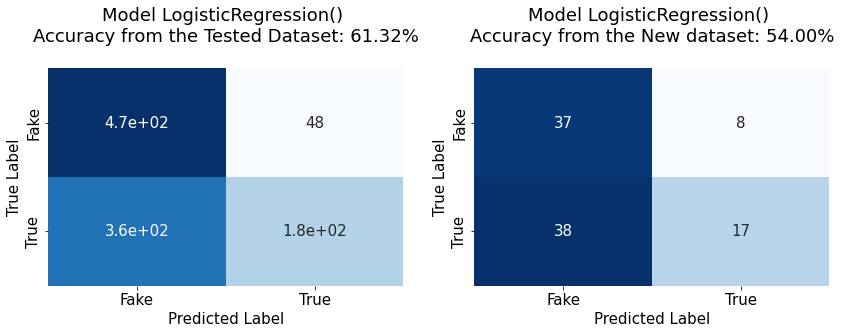

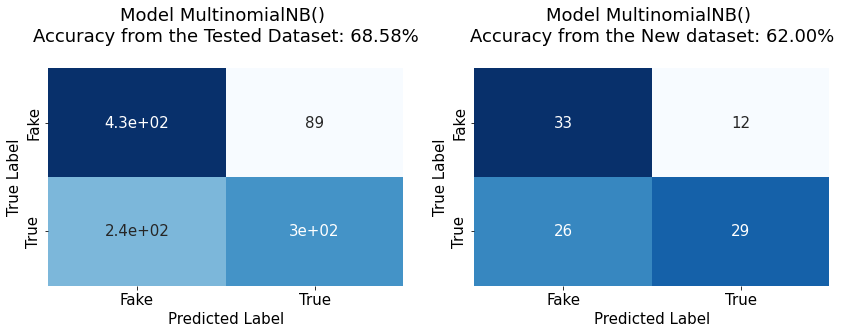

In [53]:
model(x_train_A_ps_token_pad, y_train_A_ps, x_test_A_ps_token_pad, y_test_A_ps, testA_x_ps_token_pad, testA_y)

00:00:00.44


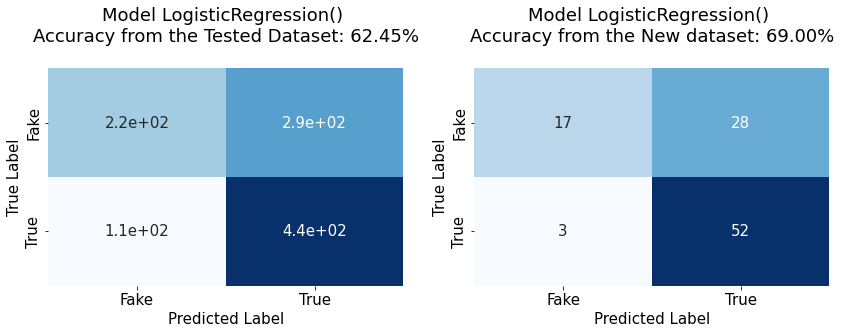

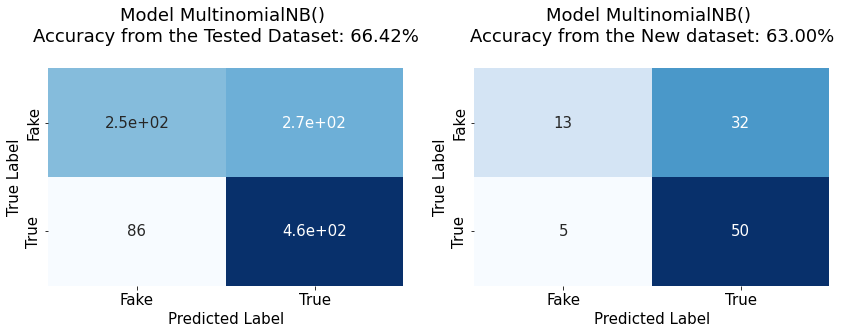

In [54]:
model(x_train_A_ps_token_pad_minmax, y_train_A_ps, x_test_A_ps_token_pad_minmax, y_test_A_ps, testA_x_ps_token_pad_minmax, testA_y)

00:00:00.69


C:\Users\Αλέξανδρος\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



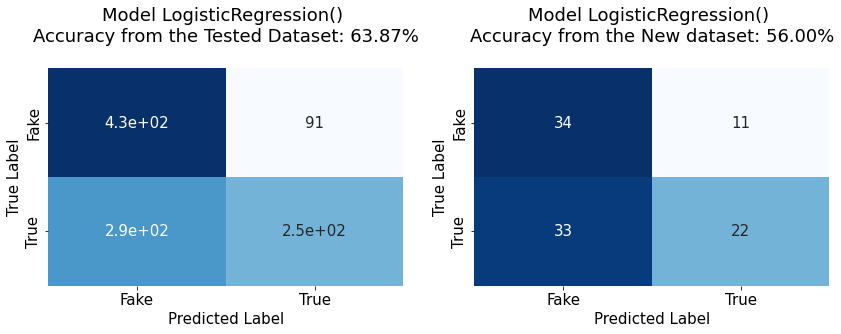

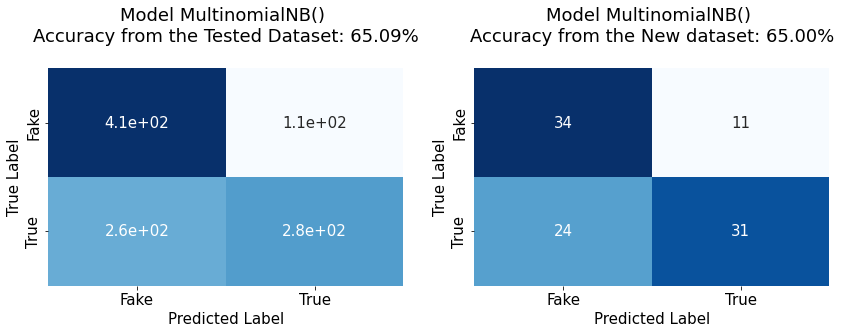

In [55]:
model(x_train_A_ls_token_pad, y_train_A_ls, x_test_A_ls_token_pad, y_test_A_ls, testA_x_ls_token_pad, testA_y)

00:00:00.57


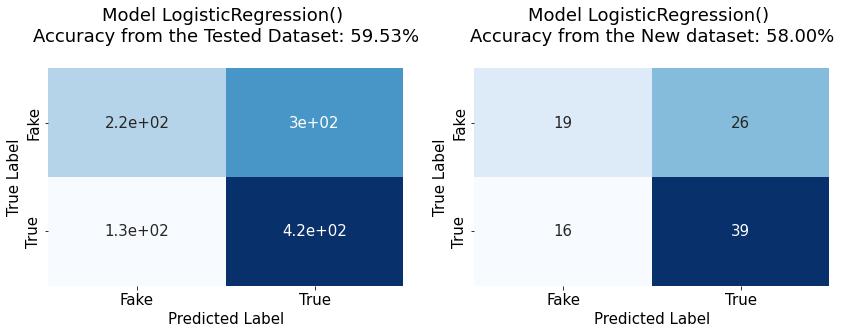

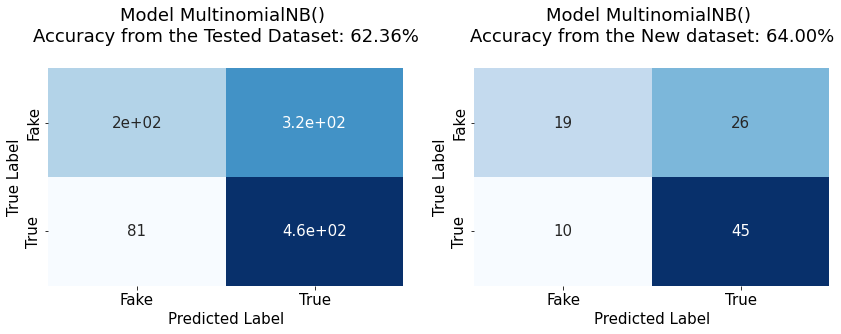

In [56]:
model(x_train_A_ls_token_pad_minmax, y_train_A_ls, x_test_A_ls_token_pad_minmax, y_test_A_ls, testA_x_ls_token_pad_minmax, testA_y)

00:00:00.13


C:\Users\Αλέξανδρος\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



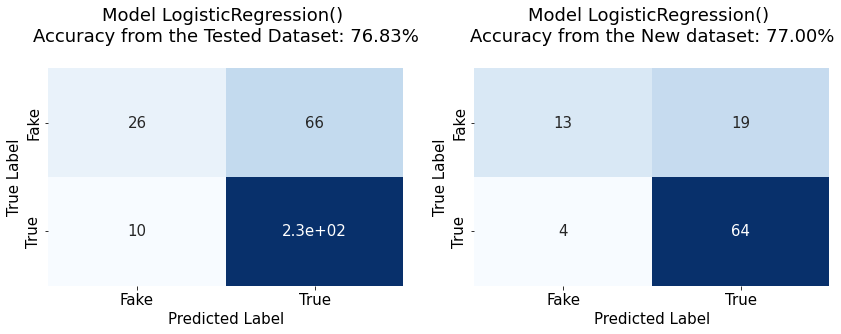

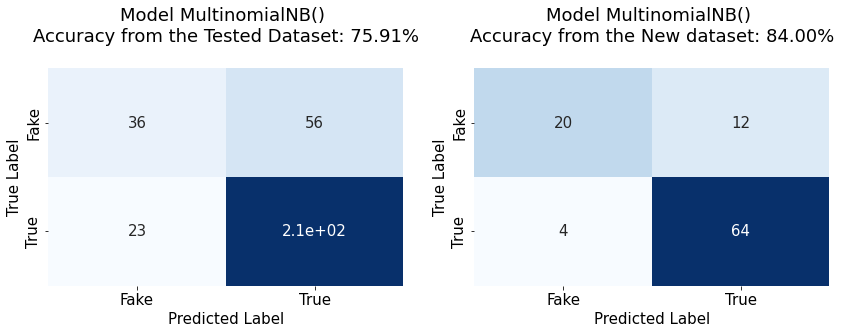

In [57]:
model(x_train_B_ps_token_pad, y_train_B_ps, x_test_B_ps_token_pad, y_test_B_ps, testB_x_ps_token_pad, testB_y)

00:00:00.11


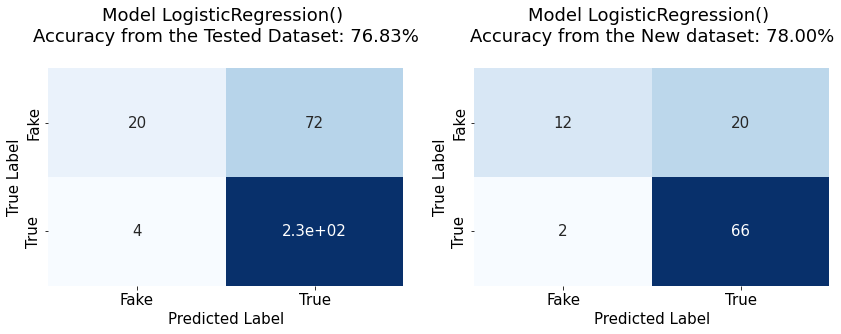

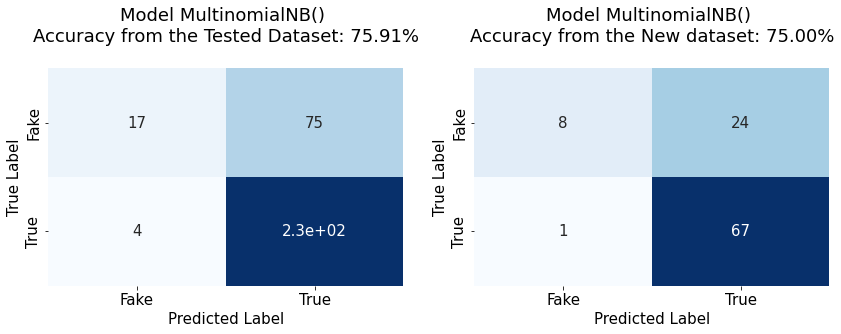

In [58]:
model(x_train_B_ps_token_pad_minmax, y_train_B_ps, x_test_B_ps_token_pad_minmax, y_test_B_ps, testB_x_ps_token_pad_minmax, testB_y)

00:00:00.13


C:\Users\Αλέξανδρος\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



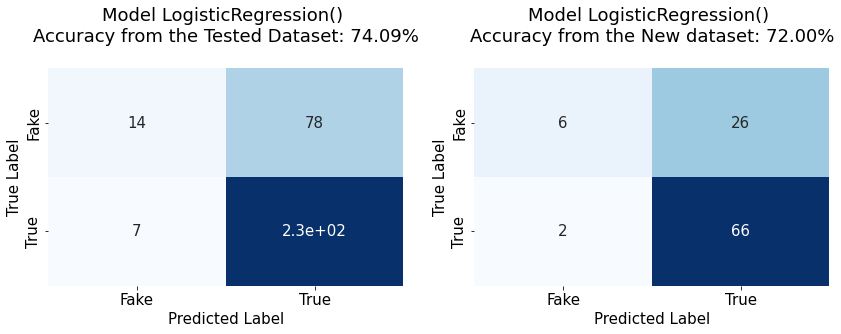

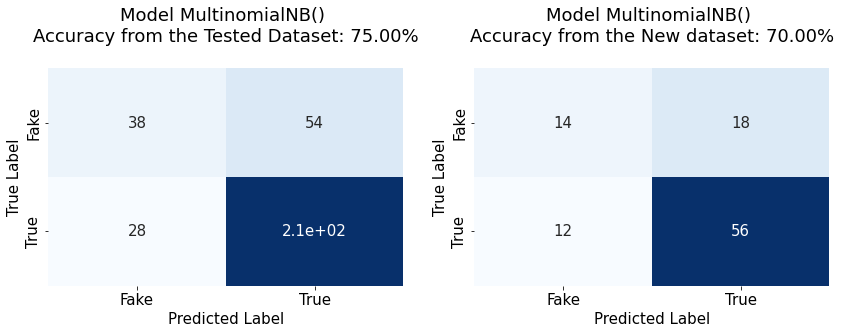

In [59]:
model(x_train_B_ls_token_pad, y_train_B_ls, x_test_B_ls_token_pad, y_test_B_ls, testB_x_ls_token_pad, testB_y)

00:00:00.11


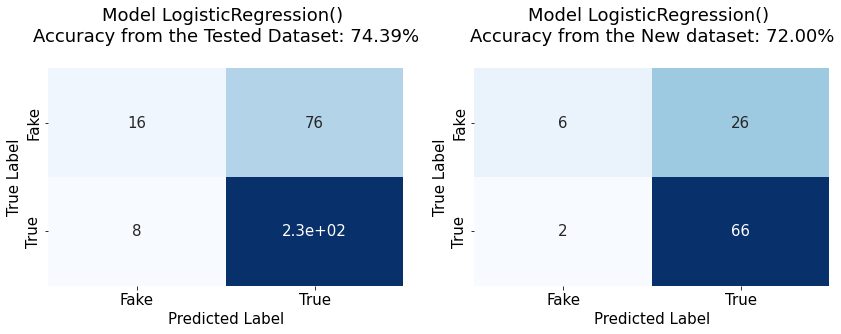

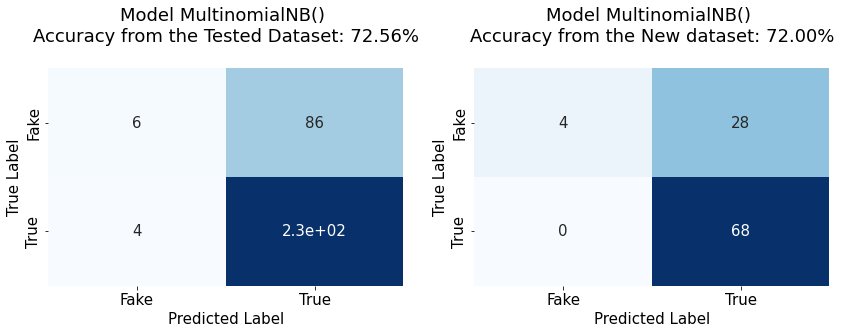

In [60]:
model(x_train_B_ls_token_pad_minmax, y_train_B_ls, x_test_B_ls_token_pad_minmax, y_test_B_ls, testB_x_ls_token_pad_minmax, testB_y)

In [61]:
def model_with_count_vector(x_train, y_train, x_test, y_test, future_x, future_y, n):
    tf_idf_vec = CountVectorizer(ngram_range=(n,n))
    x_train = tf_idf_vec.fit_transform(x_train)
    x_test = tf_idf_vec.transform(x_test)
    future_x = tf_idf_vec.transform(future_x)    
    x_train = pd.DataFrame(x_train.toarray(),columns=tf_idf_vec.get_feature_names_out())
    x_test = pd.DataFrame(x_test.toarray(),columns=tf_idf_vec.get_feature_names_out())
    future_x = pd.DataFrame(future_x.toarray(),columns=tf_idf_vec.get_feature_names_out())
    x_train = x_train.squeeze()
    y_train = y_train.squeeze()
    x_test = x_test.squeeze()
    y_test = y_test.squeeze()
    future_x = future_x.squeeze()
    future_y = future_y.squeeze()
    log = LogisticRegression()
    mul = MultinomialNB()
    model = [log, mul]
    x_axis_labels=['Fake', 'True' ]
    y_axis_labels=['Fake', 'True' ]
    
    for i in model:
        i.fit(x_train, y_train)
        prediction1 = i.predict(x_test)
        prediction2 = i.predict(future_x)
        accuracy1 = accuracy_score(list(y_test), prediction1)
        accuracy2 = accuracy_score(list(future_y), prediction2)
        cm1 = confusion_matrix(list(y_test), prediction1)
        cm2 = confusion_matrix(list(future_y), prediction2)
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 4))
        g1 = sns.heatmap(cm1, annot = True, xticklabels=x_axis_labels, yticklabels=y_axis_labels, ax=ax1, cmap="Blues",cbar=False)
        acc1 = "{:.2f}".format(accuracy1*100)
        g1.set_title(f'Model {i} \nAccuracy from the Tested Dataset: {acc1}%\n')
        g1.set_ylabel('True Label')
        g1.set_xlabel('Predicted Label')
        
        g2 = sns.heatmap(cm2, annot = True, xticklabels=x_axis_labels, yticklabels=y_axis_labels, ax=ax2, cmap="Blues",cbar=False)
        acc2 = "{:.2f}".format(accuracy2*100)
        g2.set_title(f'Model {i} \nAccuracy from the New dataset: {acc2}%\n')
        g2.set_ylabel('True Label')
        g2.set_xlabel('Predicted Label')


In [62]:
def model_with_tf_idf(x_train, y_train, x_test, y_test, future_x, future_y, n):
    tf_idf_vec = TfidfVectorizer(use_idf=True, smooth_idf=False, ngram_range=(n,n))
    x_train = tf_idf_vec.fit_transform(x_train)
    x_test = tf_idf_vec.transform(x_test)
    future_x = tf_idf_vec.transform(future_x)    
    x_train = pd.DataFrame(x_train.toarray(),columns=tf_idf_vec.get_feature_names_out())
    x_test = pd.DataFrame(x_test.toarray(),columns=tf_idf_vec.get_feature_names_out())
    future_x = pd.DataFrame(future_x.toarray(),columns=tf_idf_vec.get_feature_names_out())
    x_train = x_train.squeeze()
    y_train = y_train.squeeze()
    x_test = x_test.squeeze()
    y_test = y_test.squeeze()
    future_x = future_x.squeeze()
    future_y = future_y.squeeze()
    log = LogisticRegression()
    mul = MultinomialNB()
    model = [log, mul]
    x_axis_labels=['Fake', 'True' ]
    y_axis_labels=['Fake', 'True' ]
    
    for i in model:
        i.fit(x_train, y_train)
        prediction1 = i.predict(x_test)
        prediction2 = i.predict(future_x)
        accuracy1 = accuracy_score(list(y_test), prediction1)
        accuracy2 = accuracy_score(list(future_y), prediction2)
        cm1 = confusion_matrix(list(y_test), prediction1)
        cm2 = confusion_matrix(list(future_y), prediction2)
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 4))
        g1 = sns.heatmap(cm1, annot = True, xticklabels=x_axis_labels, yticklabels=y_axis_labels, ax=ax1, cmap="Blues",cbar=False)
        acc1 = "{:.2f}".format(accuracy1*100)
        g1.set_title(f'Model {i} \nAccuracy from the Tested Dataset: {acc1}%\n')
        g1.set_ylabel('True Label')
        g1.set_xlabel('Predicted Label')
        
        g2 = sns.heatmap(cm2, annot = True, xticklabels=x_axis_labels, yticklabels=y_axis_labels, ax=ax2, cmap="Blues",cbar=False)
        acc2 = "{:.2f}".format(accuracy2*100)
        g2.set_title(f'Model {i} \nAccuracy from the New dataset: {acc2}%\n')
        g2.set_ylabel('True Label')
        g2.set_xlabel('Predicted Label')


In [63]:
def model_with_count_vector_repeat(x_train, y_train, x_test, y_test, future_x, future_y, n):
    start = time.time()
    for j in range(1,n+1):
        tf_idf_vec = CountVectorizer(ngram_range=(j,j))
        x_train_this = tf_idf_vec.fit_transform(x_train)
        x_test_this = tf_idf_vec.transform(x_test)
        future_x_this = tf_idf_vec.transform(future_x)    
        x_train_this = pd.DataFrame(x_train_this.toarray(),columns=tf_idf_vec.get_feature_names_out())
        x_test_this = pd.DataFrame(x_test_this.toarray(),columns=tf_idf_vec.get_feature_names_out())
        future_x_this = pd.DataFrame(future_x_this.toarray(),columns=tf_idf_vec.get_feature_names_out())
        x_train_this = x_train_this.squeeze()
        y_train_this = y_train.squeeze()
        x_test_this = x_test_this.squeeze()
        y_test_this = y_test.squeeze()
        future_x_this = future_x_this.squeeze()
        future_y_this = future_y.squeeze()
        log = LogisticRegression()
        mul = MultinomialNB()
        model = [log, mul]
        print(f'\n{j}-gram')

        for i in model:
            i.fit(x_train_this, y_train_this)
            prediction1 = i.predict(x_test_this)
            prediction2 = i.predict(future_x_this)
            accuracy1 = accuracy_score(list(y_test_this), prediction1)
            accuracy2 = accuracy_score(list(future_y_this), prediction2)
            acc1 = "{:.2f}".format(accuracy1*100)
            acc2 = "{:.2f}".format(accuracy2*100)
            print(f'Model {i}-> Accuracy with the Tested Dataset is {acc1}%')
            print(f'Model {i}-> Accuracy with the New Dataset is {acc2}%')   
        
    end = time.time()
    hours, rem = divmod(end-start, 3600)
    minutes, seconds = divmod(rem, 60)
    print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))
           

In [64]:
def model_with_tf_idf_repeat(x_train, y_train, x_test, y_test, future_x, future_y, n):
    start = time.time()
    for j in range(1,n+1):
        tf_idf_vec = TfidfVectorizer(use_idf=True, smooth_idf=False, ngram_range=(j,j))
        x_train_this = tf_idf_vec.fit_transform(x_train)
        x_test_this = tf_idf_vec.transform(x_test)
        future_x_this = tf_idf_vec.transform(future_x)    
        x_train_this = pd.DataFrame(x_train_this.toarray(),columns=tf_idf_vec.get_feature_names_out())
        x_test_this = pd.DataFrame(x_test_this.toarray(),columns=tf_idf_vec.get_feature_names_out())
        future_x_this = pd.DataFrame(future_x_this.toarray(),columns=tf_idf_vec.get_feature_names_out())
        x_train_this = x_train_this.squeeze()
        y_train_this = y_train.squeeze()
        x_test_this = x_test_this.squeeze()
        y_test_this = y_test.squeeze()
        future_x_this = future_x_this.squeeze()
        future_y_this = future_y.squeeze()
        log = LogisticRegression()
        mul = MultinomialNB()
        model = [log, mul]
        print(f'\n{j}-gram')

        for i in model:
            i.fit(x_train_this, y_train_this)
            prediction1 = i.predict(x_test_this)
            prediction2 = i.predict(future_x_this)
            accuracy1 = accuracy_score(list(y_test_this), prediction1)
            accuracy2 = accuracy_score(list(future_y_this), prediction2)
            acc1 = "{:.2f}".format(accuracy1*100)
            acc2 = "{:.2f}".format(accuracy2*100)
            print(f'Model {i}-> Accuracy with the Tested Dataset is {acc1}%')
            print(f'Model {i}-> Accuracy with the New Dataset is {acc2}%')
            
    end = time.time()
    hours, rem = divmod(end-start, 3600)
    minutes, seconds = divmod(rem, 60)
    print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

In [65]:
model_with_count_vector_repeat(x_train_A_ps, y_train_A_ps, x_test_A_ps, y_test_A_ps, testA_x_ps, testA_y,4)


1-gram
Model LogisticRegression()-> Accuracy with the Tested Dataset is 91.98%
Model LogisticRegression()-> Accuracy with the New Dataset is 91.00%
Model MultinomialNB()-> Accuracy with the Tested Dataset is 90.66%
Model MultinomialNB()-> Accuracy with the New Dataset is 85.00%

2-gram
Model LogisticRegression()-> Accuracy with the Tested Dataset is 86.70%
Model LogisticRegression()-> Accuracy with the New Dataset is 86.00%
Model MultinomialNB()-> Accuracy with the Tested Dataset is 88.02%
Model MultinomialNB()-> Accuracy with the New Dataset is 88.00%

3-gram
Model LogisticRegression()-> Accuracy with the Tested Dataset is 77.17%
Model LogisticRegression()-> Accuracy with the New Dataset is 74.00%
Model MultinomialNB()-> Accuracy with the Tested Dataset is 71.42%
Model MultinomialNB()-> Accuracy with the New Dataset is 76.00%

4-gram
Model LogisticRegression()-> Accuracy with the Tested Dataset is 70.75%
Model LogisticRegression()-> Accuracy with the New Dataset is 68.00%
Model Multi

In [66]:
model_with_count_vector_repeat(x_train_A_ls, y_train_A_ls, x_test_A_ls, y_test_A_ls, testA_x_ls, testA_y,4)


1-gram
Model LogisticRegression()-> Accuracy with the Tested Dataset is 91.42%
Model LogisticRegression()-> Accuracy with the New Dataset is 90.00%
Model MultinomialNB()-> Accuracy with the Tested Dataset is 90.19%
Model MultinomialNB()-> Accuracy with the New Dataset is 85.00%

2-gram
Model LogisticRegression()-> Accuracy with the Tested Dataset is 86.98%
Model LogisticRegression()-> Accuracy with the New Dataset is 86.00%
Model MultinomialNB()-> Accuracy with the Tested Dataset is 88.30%
Model MultinomialNB()-> Accuracy with the New Dataset is 86.00%

3-gram
Model LogisticRegression()-> Accuracy with the Tested Dataset is 77.17%
Model LogisticRegression()-> Accuracy with the New Dataset is 74.00%
Model MultinomialNB()-> Accuracy with the Tested Dataset is 71.60%
Model MultinomialNB()-> Accuracy with the New Dataset is 77.00%

4-gram
Model LogisticRegression()-> Accuracy with the Tested Dataset is 70.85%
Model LogisticRegression()-> Accuracy with the New Dataset is 68.00%
Model Multi

In [67]:
model_with_count_vector_repeat(x_train_B_ps, y_train_B_ps, x_test_B_ps, y_test_B_ps, testB_x_ps, testB_y,4)


1-gram
Model LogisticRegression()-> Accuracy with the Tested Dataset is 89.33%
Model LogisticRegression()-> Accuracy with the New Dataset is 94.00%
Model MultinomialNB()-> Accuracy with the Tested Dataset is 89.02%
Model MultinomialNB()-> Accuracy with the New Dataset is 92.00%

2-gram
Model LogisticRegression()-> Accuracy with the Tested Dataset is 79.27%
Model LogisticRegression()-> Accuracy with the New Dataset is 77.00%
Model MultinomialNB()-> Accuracy with the Tested Dataset is 83.84%
Model MultinomialNB()-> Accuracy with the New Dataset is 89.00%

3-gram
Model LogisticRegression()-> Accuracy with the Tested Dataset is 74.70%
Model LogisticRegression()-> Accuracy with the New Dataset is 72.00%
Model MultinomialNB()-> Accuracy with the Tested Dataset is 77.44%
Model MultinomialNB()-> Accuracy with the New Dataset is 76.00%

4-gram
Model LogisticRegression()-> Accuracy with the Tested Dataset is 73.78%
Model LogisticRegression()-> Accuracy with the New Dataset is 70.00%
Model Multi

In [68]:
model_with_count_vector_repeat(x_train_B_ls, y_train_B_ls, x_test_B_ls, y_test_B_ls, testB_x_ls, testB_y,4)


1-gram
Model LogisticRegression()-> Accuracy with the Tested Dataset is 88.72%
Model LogisticRegression()-> Accuracy with the New Dataset is 92.00%
Model MultinomialNB()-> Accuracy with the Tested Dataset is 89.94%
Model MultinomialNB()-> Accuracy with the New Dataset is 92.00%

2-gram
Model LogisticRegression()-> Accuracy with the Tested Dataset is 79.27%
Model LogisticRegression()-> Accuracy with the New Dataset is 76.00%
Model MultinomialNB()-> Accuracy with the Tested Dataset is 83.23%
Model MultinomialNB()-> Accuracy with the New Dataset is 89.00%

3-gram
Model LogisticRegression()-> Accuracy with the Tested Dataset is 74.70%
Model LogisticRegression()-> Accuracy with the New Dataset is 72.00%
Model MultinomialNB()-> Accuracy with the Tested Dataset is 77.13%
Model MultinomialNB()-> Accuracy with the New Dataset is 76.00%

4-gram
Model LogisticRegression()-> Accuracy with the Tested Dataset is 73.78%
Model LogisticRegression()-> Accuracy with the New Dataset is 70.00%
Model Multi

In [69]:
model_with_tf_idf_repeat(x_train_A_ps, y_train_A_ps, x_test_A_ps, y_test_A_ps, testA_x_ps, testA_y,4)


1-gram
Model LogisticRegression()-> Accuracy with the Tested Dataset is 90.57%
Model LogisticRegression()-> Accuracy with the New Dataset is 91.00%
Model MultinomialNB()-> Accuracy with the Tested Dataset is 90.38%
Model MultinomialNB()-> Accuracy with the New Dataset is 90.00%

2-gram
Model LogisticRegression()-> Accuracy with the Tested Dataset is 88.02%
Model LogisticRegression()-> Accuracy with the New Dataset is 85.00%
Model MultinomialNB()-> Accuracy with the Tested Dataset is 87.08%
Model MultinomialNB()-> Accuracy with the New Dataset is 87.00%

3-gram
Model LogisticRegression()-> Accuracy with the Tested Dataset is 83.49%
Model LogisticRegression()-> Accuracy with the New Dataset is 83.00%
Model MultinomialNB()-> Accuracy with the Tested Dataset is 71.04%
Model MultinomialNB()-> Accuracy with the New Dataset is 74.00%

4-gram
Model LogisticRegression()-> Accuracy with the Tested Dataset is 76.79%
Model LogisticRegression()-> Accuracy with the New Dataset is 75.00%
Model Multi

In [70]:
model_with_tf_idf_repeat(x_train_A_ls, y_train_A_ls, x_test_A_ls, y_test_A_ls, testA_x_ls, testA_y,4)


1-gram
Model LogisticRegression()-> Accuracy with the Tested Dataset is 90.94%
Model LogisticRegression()-> Accuracy with the New Dataset is 91.00%
Model MultinomialNB()-> Accuracy with the Tested Dataset is 89.91%
Model MultinomialNB()-> Accuracy with the New Dataset is 91.00%

2-gram
Model LogisticRegression()-> Accuracy with the Tested Dataset is 88.40%
Model LogisticRegression()-> Accuracy with the New Dataset is 85.00%
Model MultinomialNB()-> Accuracy with the Tested Dataset is 87.83%
Model MultinomialNB()-> Accuracy with the New Dataset is 85.00%

3-gram
Model LogisticRegression()-> Accuracy with the Tested Dataset is 84.15%
Model LogisticRegression()-> Accuracy with the New Dataset is 83.00%
Model MultinomialNB()-> Accuracy with the Tested Dataset is 71.32%
Model MultinomialNB()-> Accuracy with the New Dataset is 75.00%

4-gram
Model LogisticRegression()-> Accuracy with the Tested Dataset is 76.89%
Model LogisticRegression()-> Accuracy with the New Dataset is 75.00%
Model Multi

In [71]:
model_with_tf_idf_repeat(x_train_B_ps, y_train_B_ps, x_test_B_ps, y_test_B_ps, testB_x_ps, testB_y,4)


1-gram
Model LogisticRegression()-> Accuracy with the Tested Dataset is 85.06%
Model LogisticRegression()-> Accuracy with the New Dataset is 87.00%
Model MultinomialNB()-> Accuracy with the Tested Dataset is 81.40%
Model MultinomialNB()-> Accuracy with the New Dataset is 88.00%

2-gram
Model LogisticRegression()-> Accuracy with the Tested Dataset is 76.52%
Model LogisticRegression()-> Accuracy with the New Dataset is 72.00%
Model MultinomialNB()-> Accuracy with the Tested Dataset is 78.66%
Model MultinomialNB()-> Accuracy with the New Dataset is 76.00%

3-gram
Model LogisticRegression()-> Accuracy with the Tested Dataset is 73.78%
Model LogisticRegression()-> Accuracy with the New Dataset is 71.00%
Model MultinomialNB()-> Accuracy with the Tested Dataset is 74.70%
Model MultinomialNB()-> Accuracy with the New Dataset is 72.00%

4-gram
Model LogisticRegression()-> Accuracy with the Tested Dataset is 73.17%
Model LogisticRegression()-> Accuracy with the New Dataset is 69.00%
Model Multi

In [72]:
model_with_tf_idf_repeat(x_train_B_ls, y_train_B_ls, x_test_B_ls, y_test_B_ls, testB_x_ls, testB_y,4)


1-gram
Model LogisticRegression()-> Accuracy with the Tested Dataset is 85.67%
Model LogisticRegression()-> Accuracy with the New Dataset is 88.00%
Model MultinomialNB()-> Accuracy with the Tested Dataset is 79.88%
Model MultinomialNB()-> Accuracy with the New Dataset is 86.00%

2-gram
Model LogisticRegression()-> Accuracy with the Tested Dataset is 76.83%
Model LogisticRegression()-> Accuracy with the New Dataset is 73.00%
Model MultinomialNB()-> Accuracy with the Tested Dataset is 78.96%
Model MultinomialNB()-> Accuracy with the New Dataset is 76.00%

3-gram
Model LogisticRegression()-> Accuracy with the Tested Dataset is 73.78%
Model LogisticRegression()-> Accuracy with the New Dataset is 71.00%
Model MultinomialNB()-> Accuracy with the Tested Dataset is 74.70%
Model MultinomialNB()-> Accuracy with the New Dataset is 72.00%

4-gram
Model LogisticRegression()-> Accuracy with the Tested Dataset is 73.17%
Model LogisticRegression()-> Accuracy with the New Dataset is 69.00%
Model Multi

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, MaxPooling1D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [87]:
def lstm(x_train, y_train, x_test, y_test, future_x, future_y, n, m, e):
    start = time.time()
    
    model = Sequential()
    model.add(Embedding(n+1, input_length=m, output_dim = 128))
    model.add(LSTM(256))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1,activation= 'sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    model.summary()
    
    
    y_train = np.asarray(y_train)
    y_test = np.asarray(y_test)
    future_y = np.asarray(future_y)
    
    history = model.fit(x_train, y_train, batch_size = 64, validation_split = 0.1, epochs = e)
    print(history.history.keys())
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 4))
    ax1.plot(history.history['acc'])
    ax1.plot(history.history['val_acc'])
    ax1.set_ylabel('accuracy')
    ax1.set_xlabel('epoch')
    ax1.legend(['train', 'test'], loc='upper left')

    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_ylabel('loss')
    ax2.set_xlabel('epoch')
    ax2.legend(['train', 'test'], loc='upper left')
    x_axis_labels=['Fake', 'True' ]
    y_axis_labels=['Fake', 'True' ]
    pred1 = model.predict(x_test)
    pred2 = model.predict(future_x)
    prediction1 = []
    for i in range(len(pred1)):
        if pred1[i].item() > 0.5:
            prediction1.append(1)
        else:
            prediction1.append(0)
    
    prediction2 = []
    for i in range(len(pred2)):
        if pred2[i].item() > 0.5:
            prediction2.append(1)
        else:
            prediction2.append(0)


    accuracy1 = accuracy_score(list(y_test), prediction1)
    accuracy2 = accuracy_score(list(future_y), prediction2)
    cm1 = confusion_matrix(list(y_test), prediction1)
    cm2 = confusion_matrix(list(future_y), prediction2)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 4))
    g1 = sns.heatmap(cm1, annot = True, xticklabels=x_axis_labels, yticklabels=y_axis_labels, ax=ax1, cmap="Blues",cbar=False)
    acc1 = "{:.2f}".format(accuracy1*100)
    g1.set_title(f'Accuracy from the Tested Dataset: {acc1}%\n')
    g1.set_ylabel('True Label')
    g1.set_xlabel('Predicted Label')

    g2 = sns.heatmap(cm2, annot = True, xticklabels=x_axis_labels, yticklabels=y_axis_labels, ax=ax2, cmap="Blues",cbar=False)
    acc2 = "{:.2f}".format(accuracy2*100)
    g2.set_title(f'Accuracy from the New dataset: {acc2}%\n')
    g2.set_ylabel('True Label')
    g2.set_xlabel('Predicted Label')
    
    end = time.time()
    hours, rem = divmod(end-start, 3600)
    minutes, seconds = divmod(rem, 60)
    print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

In [90]:
def bidirectional(x_train, y_train, x_test, y_test, future_x, future_y, n, m, e):
    start = time.time()
    
    model = Sequential()
    model.add(Embedding(n+1, input_length=m, output_dim = 128))
    model.add(Bidirectional(LSTM(256))) 
    model.add(Dropout(0.3))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation = 'relu'))   
    model.add(Dropout(0.3))
    model.add(Dense(1,activation= 'sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    model.summary()
    
    
    y_train = np.asarray(y_train)
    y_test = np.asarray(y_test)
    future_y = np.asarray(future_y)
    
    history = model.fit(x_train, y_train, batch_size = 64, validation_split = 0.1, epochs = e)
    print(history.history.keys())
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 4))
    ax1.plot(history.history['acc'])
    ax1.plot(history.history['val_acc'])
    ax1.set_ylabel('accuracy')
    ax1.set_xlabel('epoch')
    ax1.legend(['train', 'test'], loc='upper left')

    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_ylabel('loss')
    ax2.set_xlabel('epoch')
    ax2.legend(['train', 'test'], loc='upper left')
    
    x_axis_labels=['Fake', 'True' ]
    y_axis_labels=['Fake', 'True' ]
    
    pred1 = model.predict(x_test)
    pred2 = model.predict(future_x)
    prediction1 = []
    for i in range(len(pred1)):
        if pred1[i].item() > 0.5:
            prediction1.append(1)
        else:
            prediction1.append(0)
    
    prediction2 = []
    for i in range(len(pred2)):
        if pred2[i].item() > 0.5:
            prediction2.append(1)
        else:
            prediction2.append(0)


    accuracy1 = accuracy_score(list(y_test), prediction1)
    accuracy2 = accuracy_score(list(future_y), prediction2)
    cm1 = confusion_matrix(list(y_test), prediction1)
    cm2 = confusion_matrix(list(future_y), prediction2)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 4))
    g1 = sns.heatmap(cm1, annot = True, xticklabels=x_axis_labels, yticklabels=y_axis_labels, ax=ax1, cmap="Blues",cbar=False)
    acc1 = "{:.2f}".format(accuracy1*100)
    g1.set_title(f'Accuracy from the Tested Dataset: {acc1}%\n')
    g1.set_ylabel('True Label')
    g1.set_xlabel('Predicted Label')

    g2 = sns.heatmap(cm2, annot = True, xticklabels=x_axis_labels, yticklabels=y_axis_labels, ax=ax2, cmap="Blues",cbar=False)
    acc2 = "{:.2f}".format(accuracy2*100)
    g2.set_title(f'Accuracy from the New dataset: {acc2}%\n')
    g2.set_ylabel('True Label')
    g2.set_xlabel('Predicted Label')
    
    end = time.time()
    hours, rem = divmod(end-start, 3600)
    minutes, seconds = divmod(rem, 60)
    print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

# lstm

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 32, 128)           460032    
                                                                 
 lstm_4 (LSTM)               (None, 256)               394240    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)               

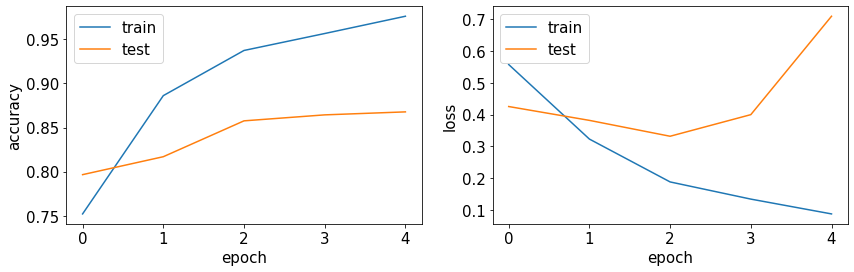

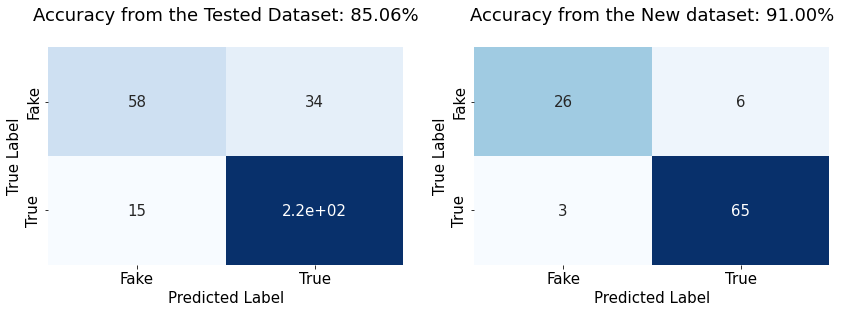

In [89]:
lstm(x_train_B_ps_token_pad, y_train_B_ps, x_test_B_ps_token_pad, y_test_B_ps, testB_x_ps_token_pad, testB_y, len(list(set(list_of_words_B_ps)))+1, maxlen_B_ps, 5)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 32, 128)           409472    
                                                                 
 lstm_5 (LSTM)               (None, 256)               394240    
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dropout_12 (Dropout)        (None, 64)               

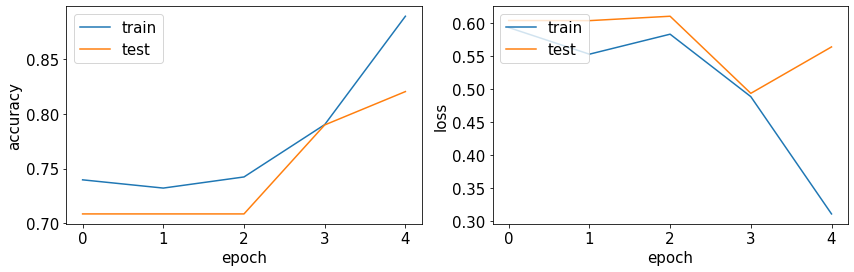

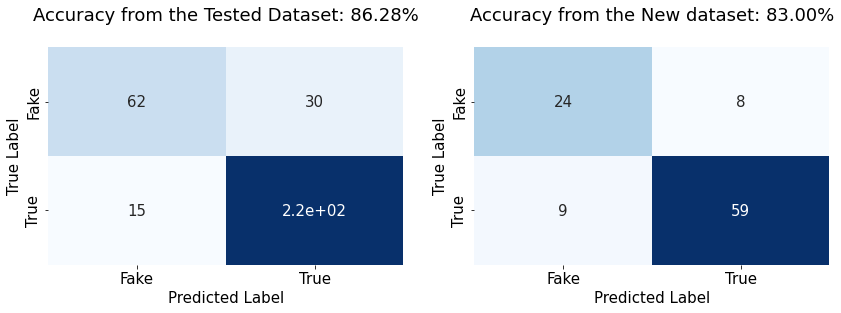

In [91]:
lstm(x_train_B_ls_token_pad, y_train_B_ls, x_test_B_ls_token_pad, y_test_B_ls, testB_x_ls_token_pad, testB_y, len(list(set(list_of_words_B_ls)))+1, maxlen_B_ls, 5)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 32, 128)           460032    
                                                                 
 lstm_6 (LSTM)               (None, 256)               394240    
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               32896     
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dropout_15 (Dropout)        (None, 64)               

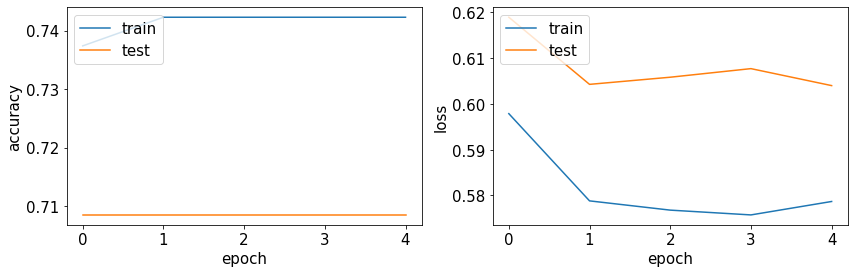

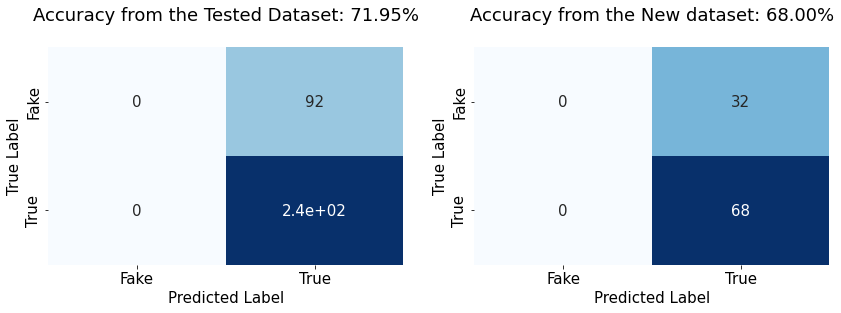

In [92]:
lstm(x_train_B_ps_token_pad_minmax, y_train_B_ps, x_test_B_ps_token_pad_minmax, y_test_B_ps, testB_x_ps_token_pad_minmax, testB_y, len(list(set(list_of_words_B_ps)))+1, maxlen_B_ps, 5)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 32, 128)           409472    
                                                                 
 lstm_7 (LSTM)               (None, 256)               394240    
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dropout_18 (Dropout)        (None, 64)               

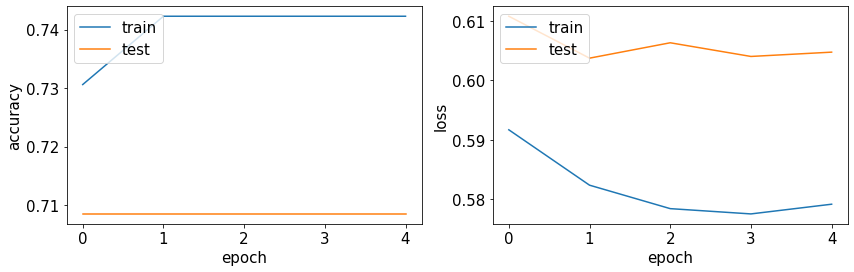

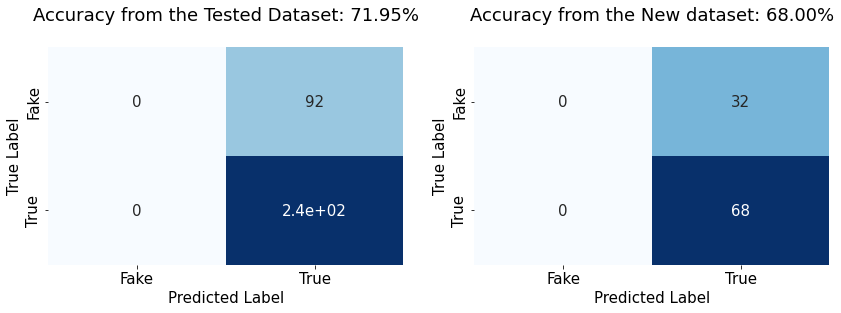

In [93]:
lstm(x_train_B_ls_token_pad_minmax, y_train_B_ls, x_test_B_ls_token_pad_minmax, y_test_B_ls, testB_x_ls_token_pad_minmax, testB_y, len(list(set(list_of_words_B_ls)))+1, maxlen_B_ls, 5)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 798, 128)          1328256   
                                                                 
 lstm_8 (LSTM)               (None, 256)               394240    
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               32896     
                                                                 
 dropout_20 (Dropout)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dropout_21 (Dropout)        (None, 64)               

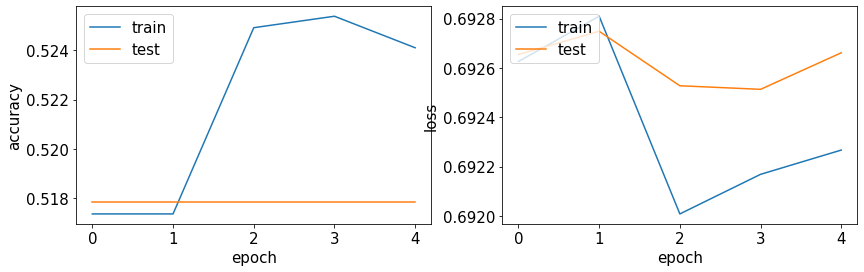

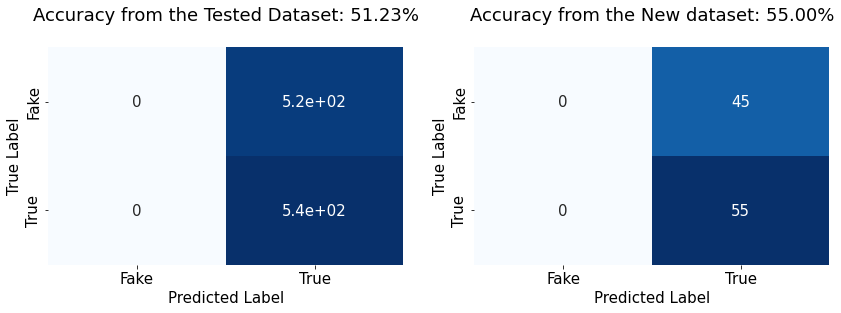

In [94]:
lstm(x_train_A_ps_token_pad, y_train_A_ps, x_test_A_ps_token_pad, y_test_A_ps, testA_x_ps_token_pad, testA_y, len(list(set(list_of_words_A_ps)))+1, maxlen_A_ps, 5)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 798, 128)          1164672   
                                                                 
 lstm_9 (LSTM)               (None, 256)               394240    
                                                                 
 dropout_22 (Dropout)        (None, 256)               0         
                                                                 
 dense_23 (Dense)            (None, 128)               32896     
                                                                 
 dropout_23 (Dropout)        (None, 128)               0         
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                                 
 dropout_24 (Dropout)        (None, 64)               

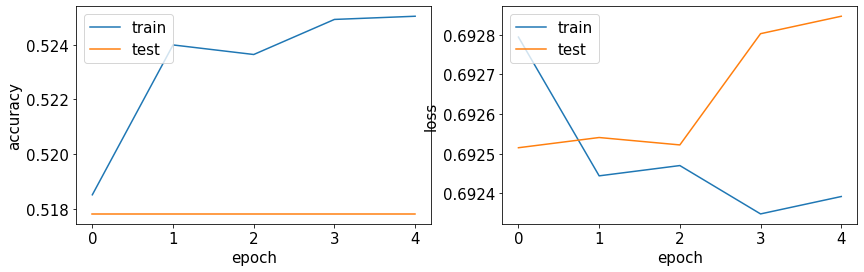

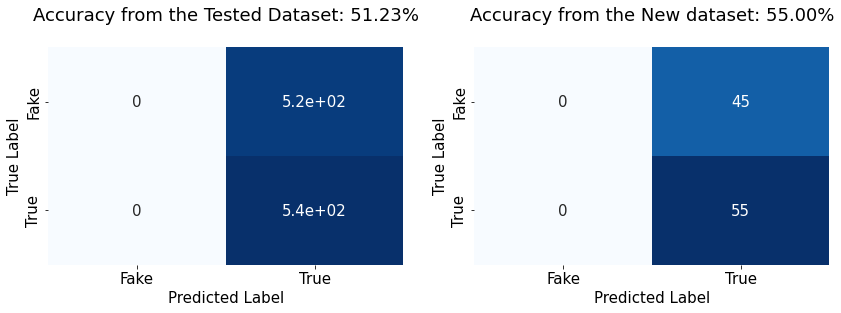

In [95]:
lstm(x_train_A_ls_token_pad, y_train_A_ls, x_test_A_ls_token_pad, y_test_A_ls, testA_x_ls_token_pad, testA_y, len(list(set(list_of_words_A_ls)))+1, maxlen_A_ls, 5)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 798, 128)          1328256   
                                                                 
 lstm_10 (LSTM)              (None, 256)               394240    
                                                                 
 dropout_25 (Dropout)        (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 128)               32896     
                                                                 
 dropout_26 (Dropout)        (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 dropout_27 (Dropout)        (None, 64)              

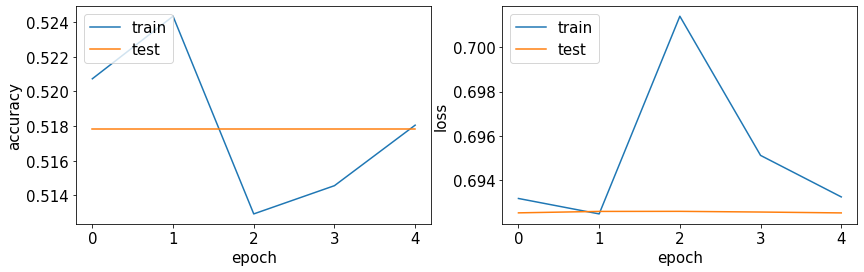

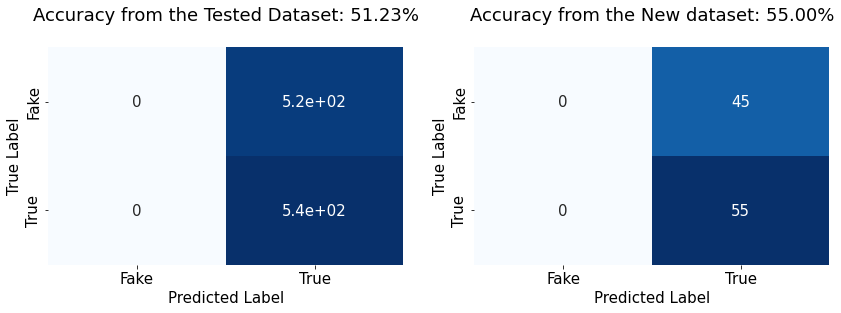

In [96]:
lstm(x_train_A_ps_token_pad_minmax, y_train_A_ps, x_test_A_ps_token_pad_minmax, y_test_A_ps, testA_x_ps_token_pad_minmax, testA_y, len(list(set(list_of_words_A_ps)))+1, maxlen_A_ps, 5)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 798, 128)          1164672   
                                                                 
 lstm_11 (LSTM)              (None, 256)               394240    
                                                                 
 dropout_28 (Dropout)        (None, 256)               0         
                                                                 
 dense_29 (Dense)            (None, 128)               32896     
                                                                 
 dropout_29 (Dropout)        (None, 128)               0         
                                                                 
 dense_30 (Dense)            (None, 64)                8256      
                                                                 
 dropout_30 (Dropout)        (None, 64)              

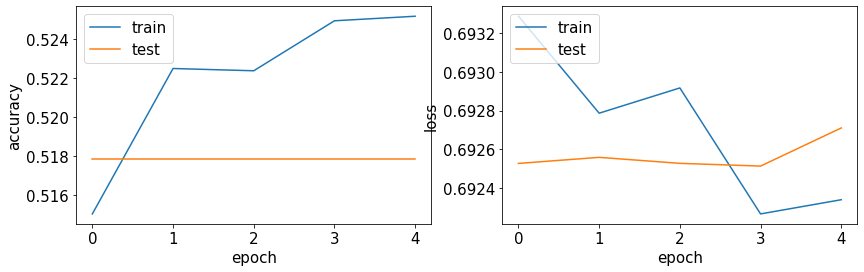

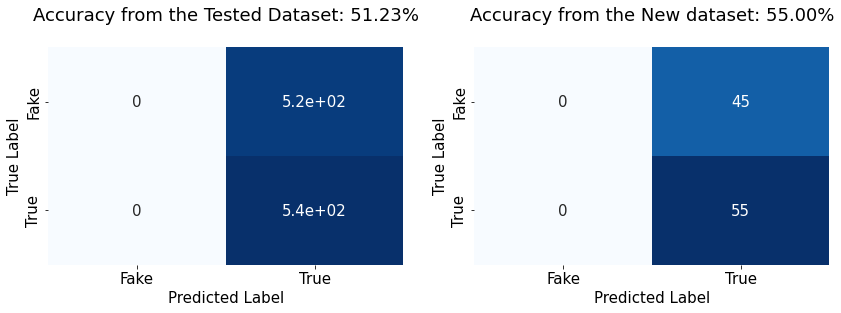

In [97]:
lstm(x_train_A_ls_token_pad_minmax, y_train_A_ls, x_test_A_ls_token_pad_minmax, y_test_A_ls, testA_x_ls_token_pad_minmax, testA_y, len(list(set(list_of_words_A_ls)))+1, maxlen_A_ls, 5)

# bidirectional

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 32, 128)           460032    
                                                                 
 bidirectional (Bidirectiona  (None, 512)              788480    
 l)                                                              
                                                                 
 dropout_31 (Dropout)        (None, 512)               0         
                                                                 
 dense_32 (Dense)            (None, 128)               65664     
                                                                 
 dropout_32 (Dropout)        (None, 128)               0         
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                     

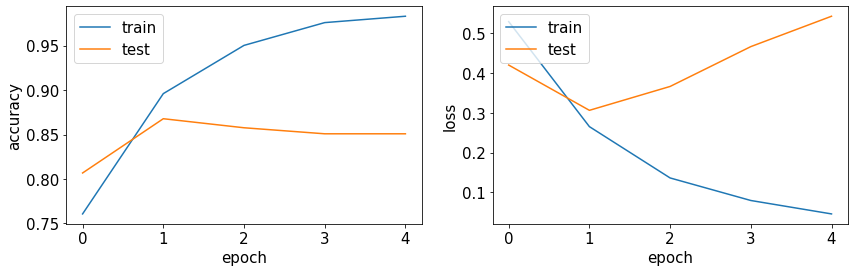

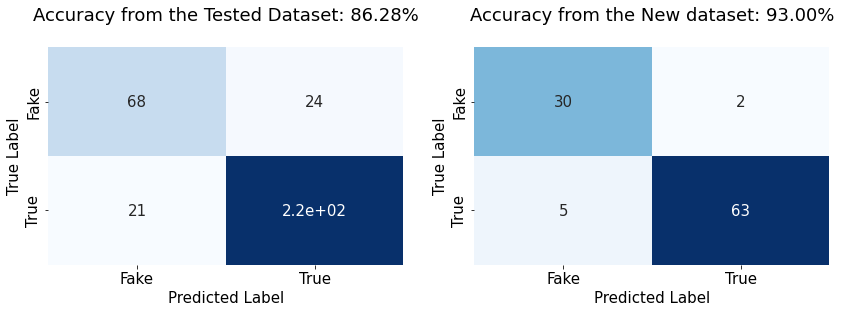

In [98]:
bidirectional(x_train_B_ps_token_pad, y_train_B_ps, x_test_B_ps_token_pad, y_test_B_ps, testB_x_ps_token_pad, testB_y, len(list(set(list_of_words_B_ps)))+1, maxlen_B_ps, 5)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 32, 128)           409472    
                                                                 
 bidirectional_1 (Bidirectio  (None, 512)              788480    
 nal)                                                            
                                                                 
 dropout_34 (Dropout)        (None, 512)               0         
                                                                 
 dense_35 (Dense)            (None, 128)               65664     
                                                                 
 dropout_35 (Dropout)        (None, 128)               0         
                                                                 
 dense_36 (Dense)            (None, 64)                8256      
                                                     

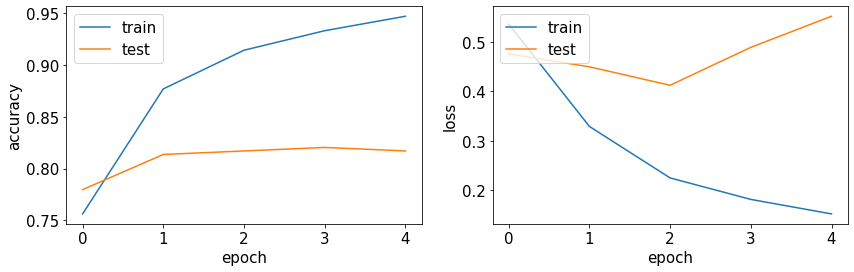

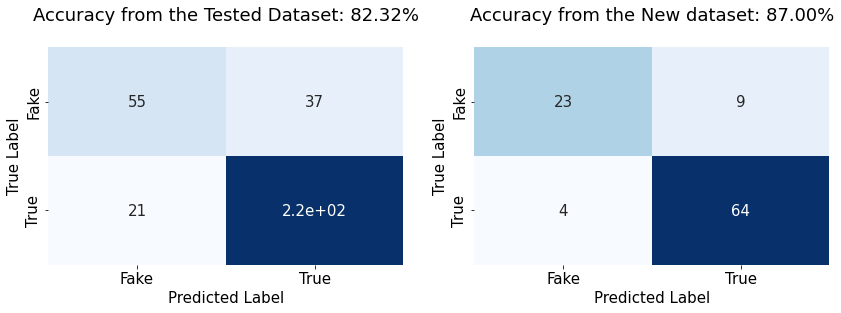

In [99]:
bidirectional(x_train_B_ls_token_pad, y_train_B_ls, x_test_B_ls_token_pad, y_test_B_ls, testB_x_ls_token_pad, testB_y, len(list(set(list_of_words_B_ls)))+1, maxlen_B_ls, 5)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 32, 128)           460032    
                                                                 
 bidirectional_2 (Bidirectio  (None, 512)              788480    
 nal)                                                            
                                                                 
 dropout_37 (Dropout)        (None, 512)               0         
                                                                 
 dense_38 (Dense)            (None, 128)               65664     
                                                                 
 dropout_38 (Dropout)        (None, 128)               0         
                                                                 
 dense_39 (Dense)            (None, 64)                8256      
                                                     

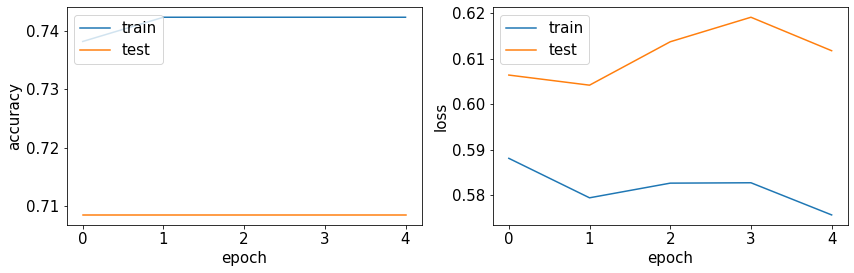

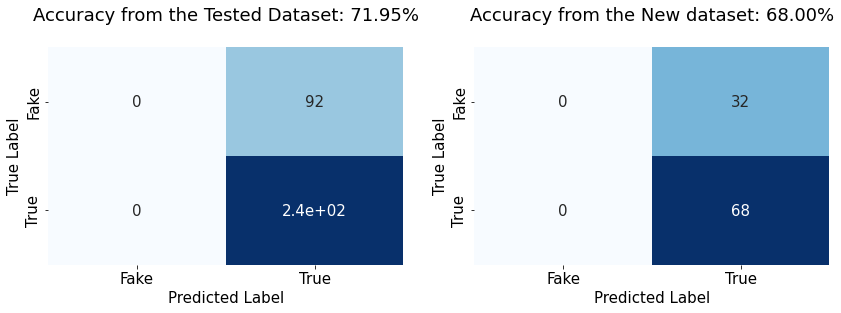

In [100]:
bidirectional(x_train_B_ps_token_pad_minmax, y_train_B_ps, x_test_B_ps_token_pad_minmax, y_test_B_ps, testB_x_ps_token_pad_minmax, testB_y, len(list(set(list_of_words_B_ps)))+1, maxlen_B_ps, 5)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 32, 128)           409472    
                                                                 
 bidirectional_3 (Bidirectio  (None, 512)              788480    
 nal)                                                            
                                                                 
 dropout_40 (Dropout)        (None, 512)               0         
                                                                 
 dense_41 (Dense)            (None, 128)               65664     
                                                                 
 dropout_41 (Dropout)        (None, 128)               0         
                                                                 
 dense_42 (Dense)            (None, 64)                8256      
                                                     

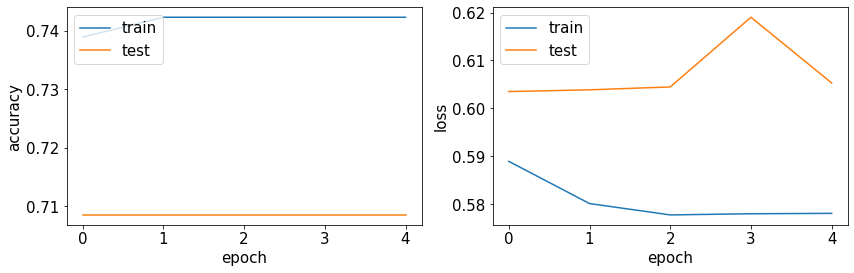

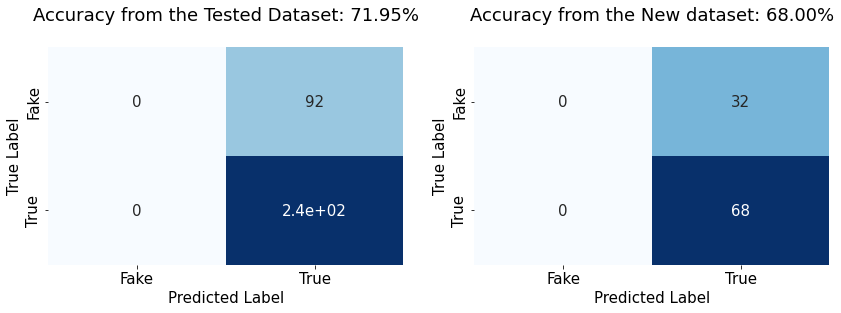

In [101]:
bidirectional(x_train_B_ls_token_pad_minmax, y_train_B_ls, x_test_B_ls_token_pad_minmax, y_test_B_ls, testB_x_ls_token_pad_minmax, testB_y, len(list(set(list_of_words_B_ls)))+1, maxlen_B_ls, 5)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 798, 128)          1328256   
                                                                 
 bidirectional_4 (Bidirectio  (None, 512)              788480    
 nal)                                                            
                                                                 
 dropout_43 (Dropout)        (None, 512)               0         
                                                                 
 dense_44 (Dense)            (None, 128)               65664     
                                                                 
 dropout_44 (Dropout)        (None, 128)               0         
                                                                 
 dense_45 (Dense)            (None, 64)                8256      
                                                     

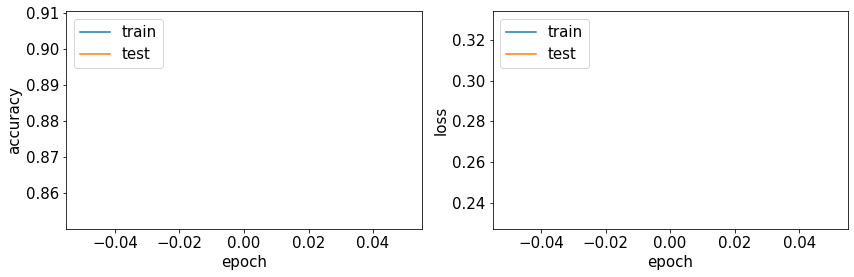

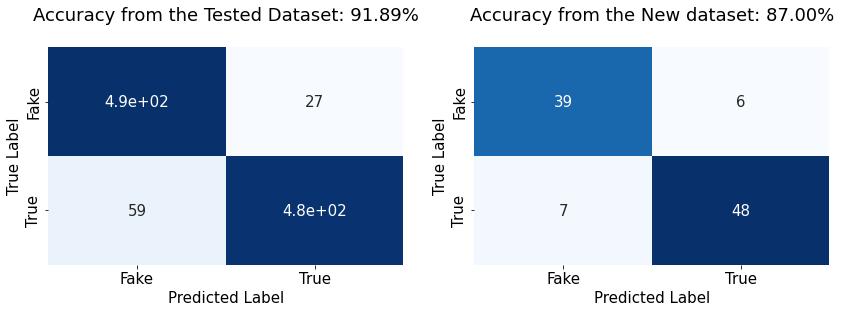

In [102]:
bidirectional(x_train_A_ps_token_pad, y_train_A_ps, x_test_A_ps_token_pad, y_test_A_ps, testA_x_ps_token_pad, testA_y, len(list(set(list_of_words_A_ps)))+1, maxlen_A_ps, 1)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 798, 128)          1164672   
                                                                 
 bidirectional_5 (Bidirectio  (None, 512)              788480    
 nal)                                                            
                                                                 
 dropout_46 (Dropout)        (None, 512)               0         
                                                                 
 dense_47 (Dense)            (None, 128)               65664     
                                                                 
 dropout_47 (Dropout)        (None, 128)               0         
                                                                 
 dense_48 (Dense)            (None, 64)                8256      
                                                     

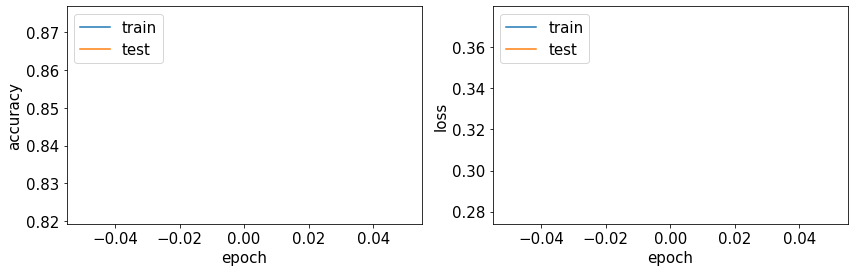

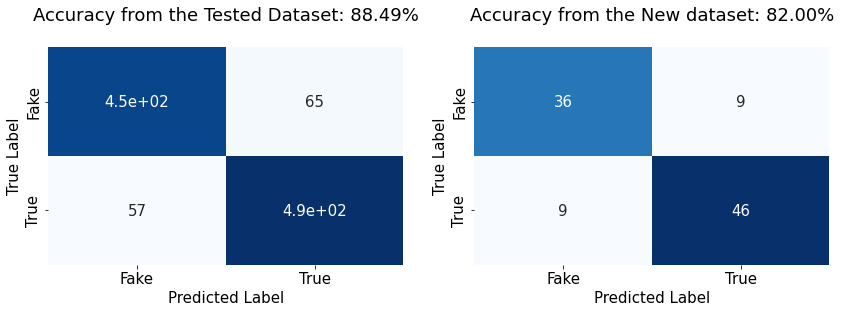

In [103]:
bidirectional(x_train_A_ls_token_pad, y_train_A_ls, x_test_A_ls_token_pad, y_test_A_ls, testA_x_ls_token_pad, testA_y, len(list(set(list_of_words_A_ls)))+1, maxlen_A_ls, 1)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 798, 128)          1328256   
                                                                 
 bidirectional_6 (Bidirectio  (None, 512)              788480    
 nal)                                                            
                                                                 
 dropout_49 (Dropout)        (None, 512)               0         
                                                                 
 dense_50 (Dense)            (None, 128)               65664     
                                                                 
 dropout_50 (Dropout)        (None, 128)               0         
                                                                 
 dense_51 (Dense)            (None, 64)                8256      
                                                     

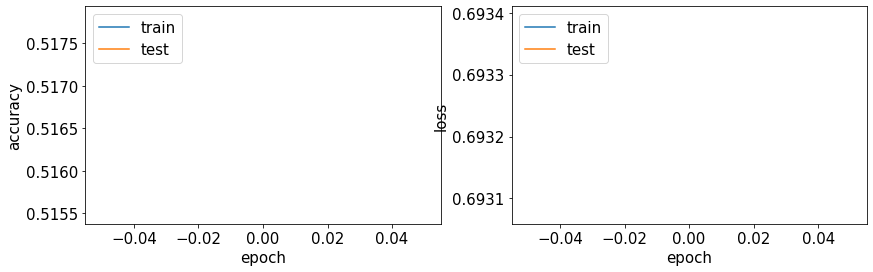

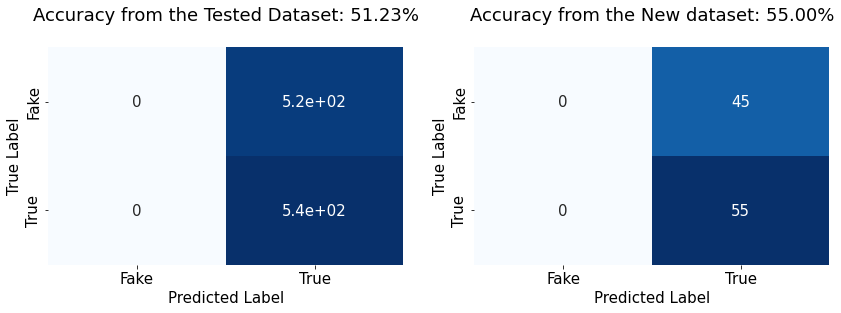

In [104]:
bidirectional(x_train_A_ps_token_pad_minmax, y_train_A_ps, x_test_A_ps_token_pad_minmax, y_test_A_ps, testA_x_ps_token_pad_minmax, testA_y, len(list(set(list_of_words_A_ps)))+1, maxlen_A_ps, 1)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 798, 128)          1164672   
                                                                 
 bidirectional_7 (Bidirectio  (None, 512)              788480    
 nal)                                                            
                                                                 
 dropout_52 (Dropout)        (None, 512)               0         
                                                                 
 dense_53 (Dense)            (None, 128)               65664     
                                                                 
 dropout_53 (Dropout)        (None, 128)               0         
                                                                 
 dense_54 (Dense)            (None, 64)                8256      
                                                     

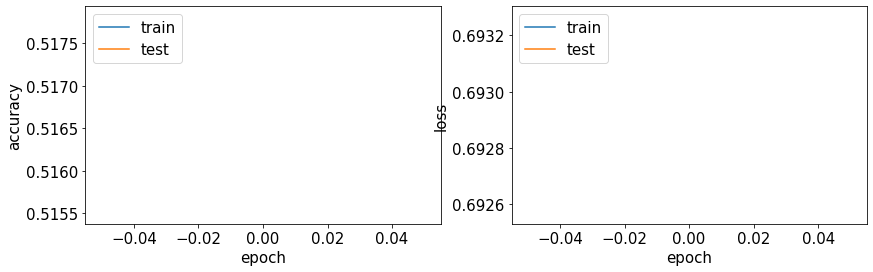

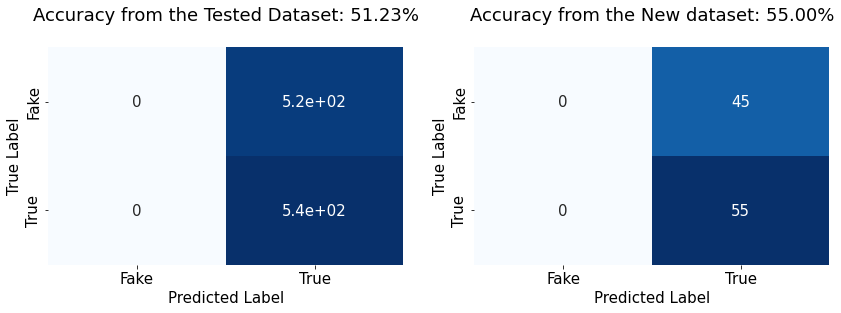

In [105]:
bidirectional(x_train_A_ls_token_pad_minmax, y_train_A_ls, x_test_A_ls_token_pad_minmax, y_test_A_ls, testA_x_ls_token_pad_minmax, testA_y, len(list(set(list_of_words_A_ls)))+1, maxlen_A_ls, 1)